<a href="https://colab.research.google.com/github/MohamedHSallam/Galton-Box-QC-/blob/main/Wiser_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notice**: The code should be executed sequentially, as certain functions and variables depend on definitions from earlier code cells.

#Must be run

In [29]:
!pip install pennylane
!pip3 install pennylane-qrack

In [30]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline

#Pennylane

##1-level Galton Box

Building the curcit

In [4]:
t1_dev_Ideal = qml.device("lightning.qubit", 4)
t1_dev_Noise = qml.device("qrack.simulator", 4, shots=1024) #adding shots to be more realistic

def _1_level_Galton_Box ():
  qml.Hadamard(0)
  qml.X(2)
  qml.CSWAP((0,1,2))
  qml.CNOT(wires=[2,0])
  qml.CSWAP((0,2,3))
  return qml.probs((1,3))

_1_level_Galton_Box_I=qml.QNode(_1_level_Galton_Box,t1_dev_Ideal) #Ideal verison
_1_level_Galton_Box_N=qml.QNode(_1_level_Galton_Box,t1_dev_Noise) #Noisy verison

Display the drawing of the circuit

(<Figure size 700x500 with 1 Axes>, <Axes: >)

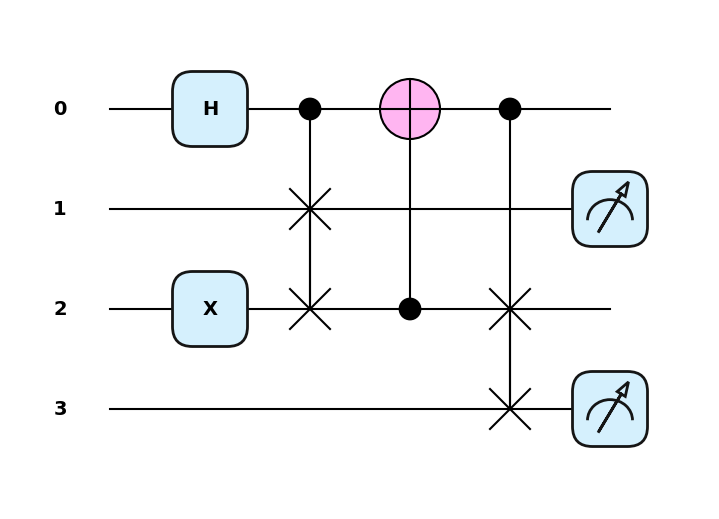

In [286]:
qml.draw_mpl(_1_level_Galton_Box_I,style="pennylane")()

Measurement result

In [16]:
print("the Ideal result is :\n",_1_level_Galton_Box_I())
print("the Noisy result is :\n",_1_level_Galton_Box_N())

the Ideal result is :
 [0.  0.5 0.5 0. ]
the Noisy result is :
 [0.         0.51367188 0.48632812 0.        ]


Ploting the data (Measurement)

/tmp/ipython-input-4097225483.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


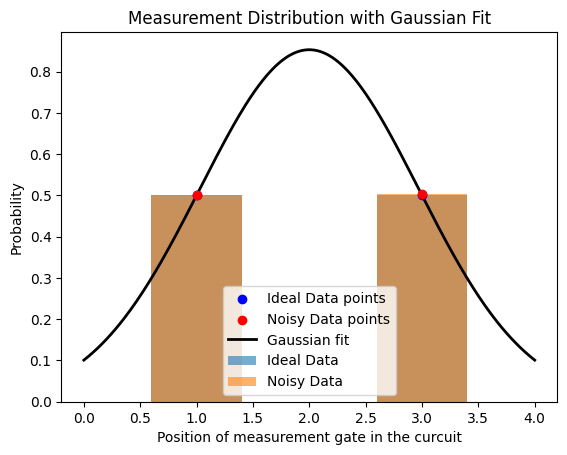



The Gassian does not seem well, because the data is very small to present it


In [6]:
x_1=[1,3]
y_1=[_1_level_Galton_Box_I()[i] for i in [2**j for j in range(int(math.log(2**1, 2)) + 1)]]
y_1_n=[_1_level_Galton_Box_N()[i] for i in [2**j for j in range(int(math.log(2**1, 2)) + 1)]]

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_1[np.argmax(y_1)]
sigma_guess = (max(x_1) - min(x_1)) / 6
amp_guess = max(y_1)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_1,
    y_1,
    p0=initial_guess,
    bounds=([min(x_1), 0, 0], [max(x_1), 1, 1]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_1)-1, max(x_1)+1, 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_1, y_1, width=0.8, alpha=0.6, label="Ideal Data")
plt.scatter(x_1, y_1, color="blue", zorder=5, label="Ideal Data points")
plt.bar(x_1, y_1_n, width=0.8, alpha=0.6, label="Noisy Data")
plt.scatter(x_1, y_1_n, color="red", zorder=5, label="Noisy Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()



this is the another way to apply Gaussian distrubtion but the data is not tottaly accurate with the curve

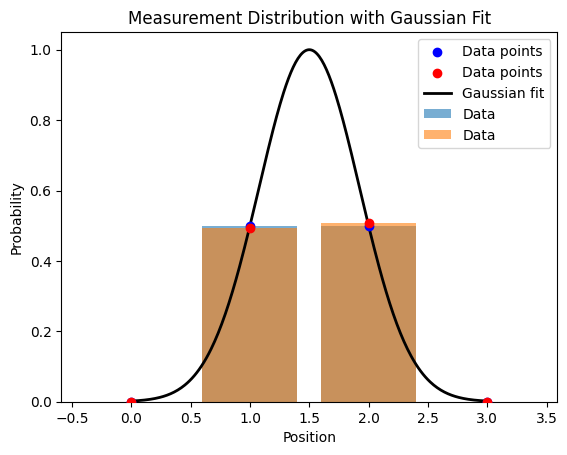

In [13]:
x_1_2=[0,1,2,3]
y_1_2=_1_level_Galton_Box_I()
y_1_2_n=_1_level_Galton_Box_N()

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_1_2[np.argmax(y_1_2)]
sigma_guess = (max(x_1_2) - min(x_1_2)) / 6
amp_guess = max(y_1_2)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_1_2,
    y_1_2,
    p0=initial_guess,
    bounds=([min(x_1_2), 0, 0], [max(x_1_2), 1, 1]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_1_2), max(x_1_2), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_1_2, y_1_2, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_1_2, y_1_2, color="blue", zorder=5, label="Data points")
plt.bar(x_1_2, y_1_2_n, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_1_2, y_1_2_n, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

##2-level Galton Box

there is two ways to replace the missing of Reset gate in Pennylane:


1.   Add extra Q-bit as a control one for the second layer
2.   Create a custom Reset gate



###Extra Q-bit

Building the curcit

In [33]:
t2_dev_Idea = qml.device("lightning.qubit", 7)
t2_dev_Noise = qml.device("qrack.simulator", 7, shots=1024)

def _2_level_Galton_Box_E ():
  qml.Hadamard(0)
  qml.X(4)
  qml.CSWAP((0,3,4))
  qml.CNOT(wires=[4,0])
  qml.CSWAP((0,4,5))
  qml.Hadamard(1)
  qml.CSWAP((1,2,3))
  qml.CNOT(wires=[3,1])
  qml.CSWAP((1,3,4))
  qml.CNOT(wires=[4,1])
  qml.CSWAP((1,4,5))
  qml.CNOT(wires=[5,1])
  qml.CSWAP((1,5,6))
  return qml.probs((2,4,6))

_2_level_Galton_Box_E_I=qml.QNode(_2_level_Galton_Box_E,t2_dev_Idea)
_2_level_Galton_Box_E_N=qml.QNode(_2_level_Galton_Box_E,t2_dev_Noise)

Display the drawing of the circuit

(<Figure size 1500x800 with 1 Axes>, <Axes: >)

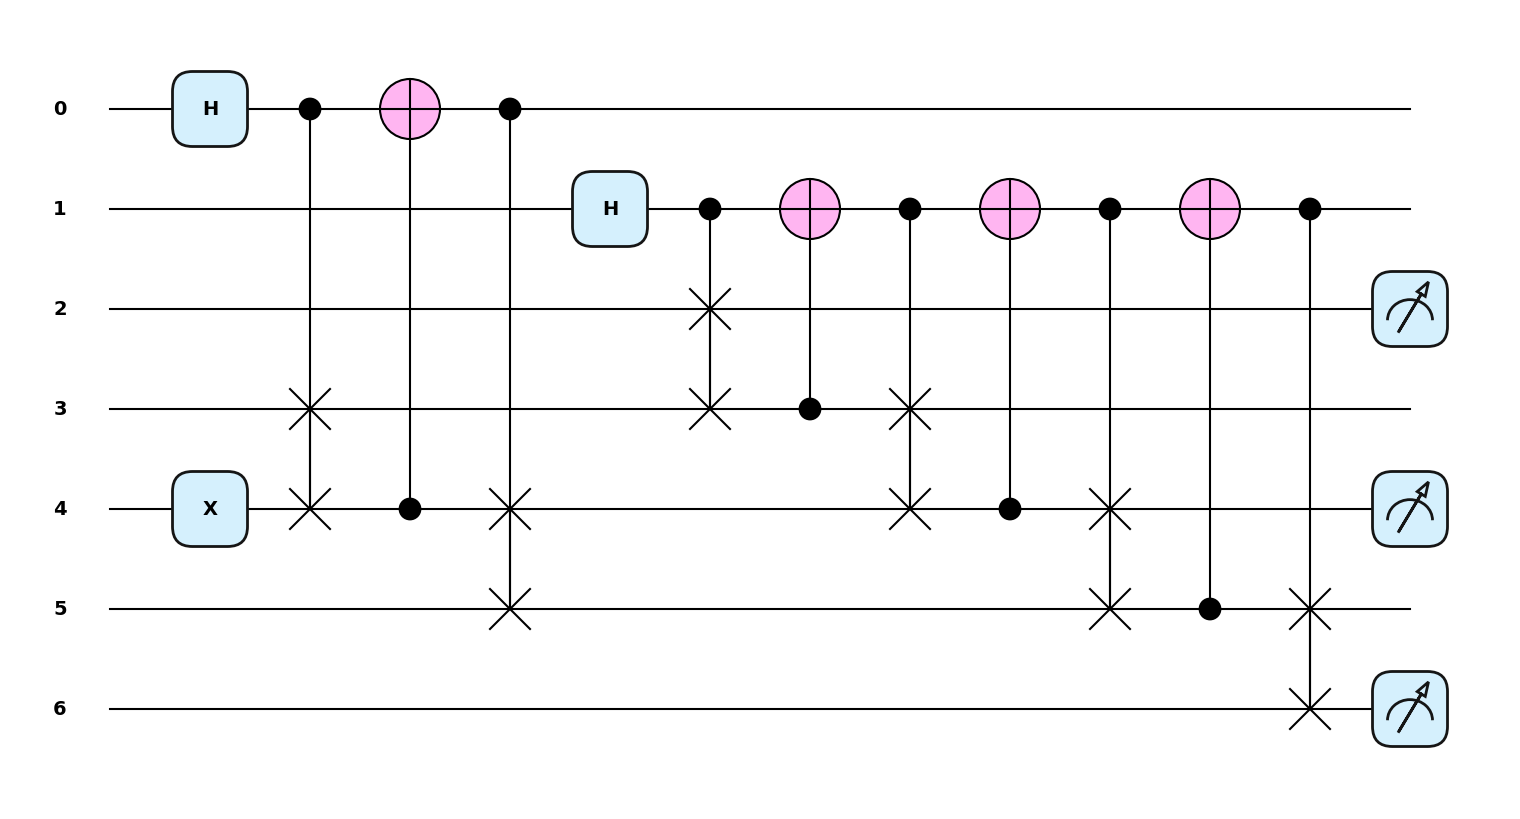

In [34]:
qml.draw_mpl(_2_level_Galton_Box_E_I,style="pennylane")()

Measurement result

In [35]:
print("the Ideal result is :\n",_2_level_Galton_Box_E_I())
print("the Noisy result is :\n",_2_level_Galton_Box_E_N())

the Ideal result is :
 [0.   0.25 0.5  0.   0.25 0.   0.   0.  ]
the Noisy result is :
 [0.         0.23535156 0.51855469 0.         0.24609375 0.
 0.         0.        ]


Ploting the data (Measurement)

/tmp/ipython-input-1953244625.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


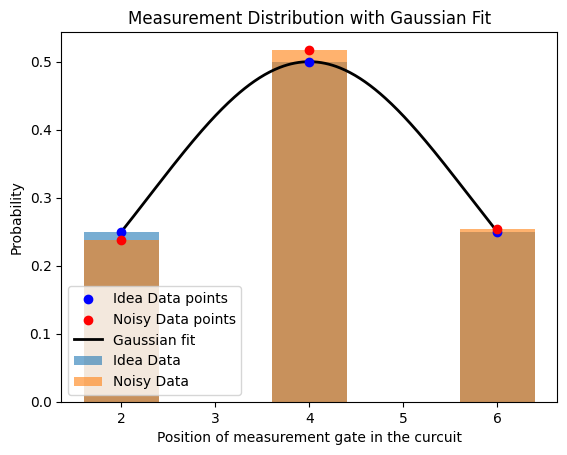

In [38]:
x_2_E=[i for i in range(2,7,2)] #index of measurement gates
y_2_E_I=[_2_level_Galton_Box_E_I()[i] for i in [2**j for j in range(int(math.log(2**2, 2)) + 1)]] #rank of level in: (2**-->n<--)
y_2_E_N=[_2_level_Galton_Box_E_N()[i] for i in [2**j for j in range(int(math.log(2**2, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_2_E[np.argmax(y_2_E_I)]
sigma_guess = (max(x_2_E) - min(x_2_E)) / 6
amp_guess = max(y_2_E_I)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_2_E,
    y_2_E_I,
    p0=initial_guess,
    bounds=([min(x_2_E), 0, 0], [max(x_2_E), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_2_E), max(x_2_E), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_2_E, y_2_E_I, width=0.8, alpha=0.6, label="Idea Data")
plt.scatter(x_2_E, y_2_E_I, color="blue", zorder=5, label="Idea Data points")
plt.bar(x_2_E, y_2_E_N, width=0.8, alpha=0.6, label="Noisy Data")
plt.scatter(x_2_E, y_2_E_N, color="red", zorder=5, label="Noisy Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

###Custom Reset gate

Forunately, the suitable Reset gate is X gate

But, it not generally efficient, because: it been created only for this problem, so it only work for these circuits/conditions

Altough, it is very efficitive and appliable, because instead of using a new Q-bit for every level it use one gate, which save more time and energy  

In [39]:
t2_dev_R_Ideal = qml.device("lightning.qubit", 6)
t2_dev_R_Noise = qml.device("qrack.simulator", 6, shots=1024)

def _2_level_Galton_Box_R ():
  qml.Hadamard(0)
  qml.X(3)
  qml.CSWAP((0,2,3))
  qml.CNOT(wires=[3,0])
  qml.CSWAP((0,3,4))
  qml.X(0) # Reset_gate
  qml.Hadamard(0)
  qml.CSWAP((0,1,2))
  qml.CNOT(wires=[2,0])
  qml.CSWAP((0,2,3))
  qml.CNOT(wires=[3,0])
  qml.CSWAP((0,3,4))
  qml.CNOT(wires=[4,0])
  qml.CSWAP((0,4,5))
  return qml.probs((1,3,5))

_2_level_Galton_Box_R_I=qml.QNode(_2_level_Galton_Box_R,t2_dev_R_Ideal)
_2_level_Galton_Box_R_N=qml.QNode(_2_level_Galton_Box_R,t2_dev_R_Noise)

Display the drawing of the circuit

(<Figure size 1600x700 with 1 Axes>, <Axes: >)

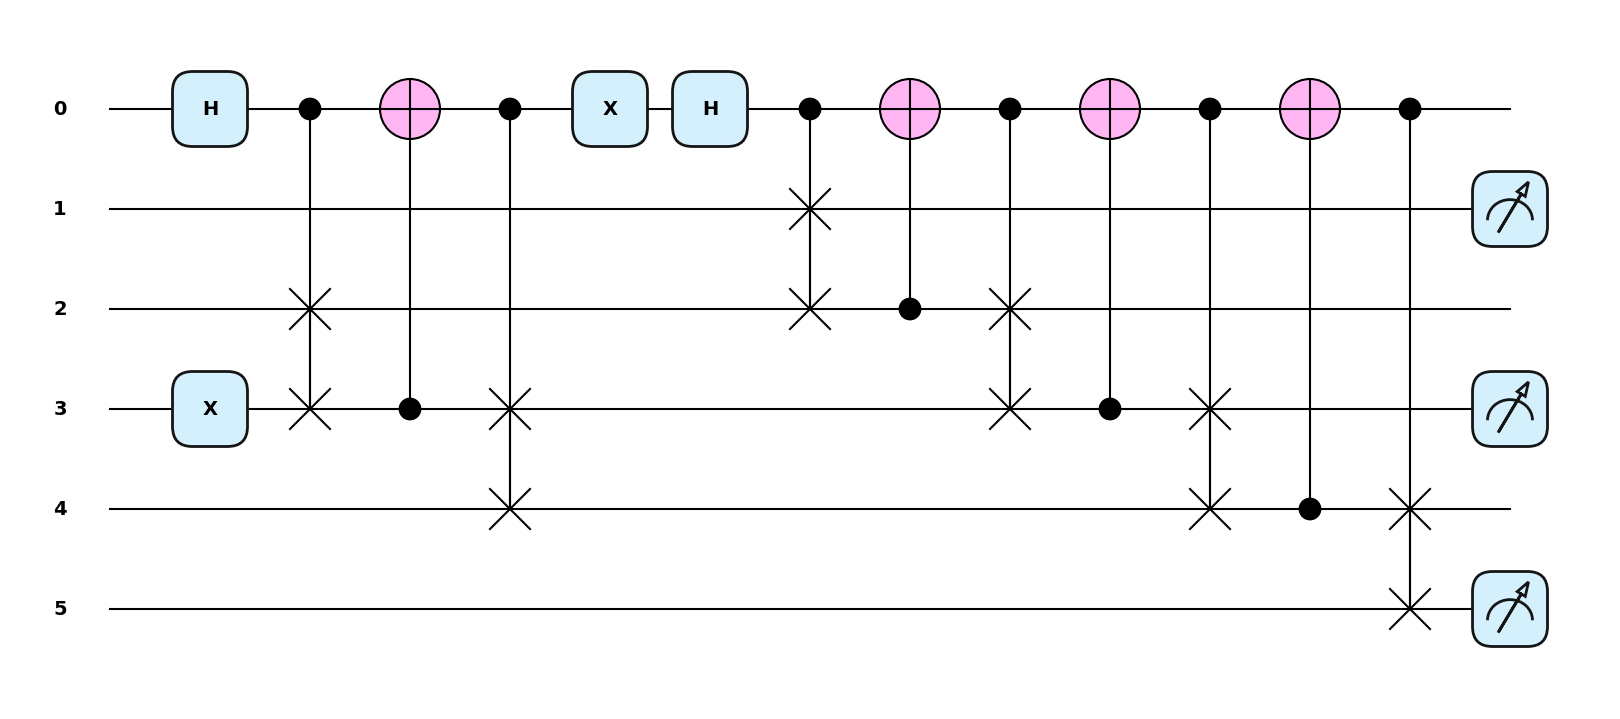

In [80]:
qml.draw_mpl(_2_level_Galton_Box_R_I,style="pennylane")()

Measurement result

In [40]:
print("the Ideal result is :\n",_2_level_Galton_Box_R_I())
print("the Noisy result is :\n",_2_level_Galton_Box_R_N())

the Ideal result is :
 [0.   0.25 0.5  0.   0.25 0.   0.   0.  ]
the Noisy result is :
 [0.         0.22167969 0.5234375  0.         0.25488281 0.
 0.         0.        ]


Ploting the data (Measurement)

/tmp/ipython-input-656227255.py:16: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(


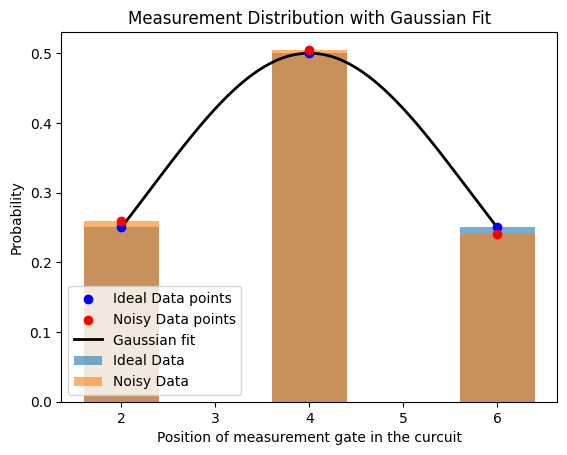

In [42]:
x_2_R=[i for i in range(2,7,2)] #index of measurement gates
y_2_R_I=[_2_level_Galton_Box_R_I()[i] for i in [2**j for j in range(int(math.log(2**2, 2)) + 1)]] #rank of level in: (2**-->n<--)
y_2_R_N=[_2_level_Galton_Box_R_N()[i] for i in [2**j for j in range(int(math.log(2**2, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_2_R[np.argmax(y_2_R_I)]
sigma_guess = (max(x_2_R) - min(x_2_R)) / 6
amp_guess = max(y_2_R_I)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_2_R,
    y_2_R_I,
    p0=initial_guess,
    bounds=([min(x_2_R), 0, 0], [max(x_2_R), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_2_R), max(x_2_R), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_2_R, y_2_R_I, width=0.8, alpha=0.6, label="Ideal Data")
plt.scatter(x_2_R, y_2_R_I, color="blue", zorder=5, label="Ideal Data points")
plt.bar(x_2_R, y_2_R_N, width=0.8, alpha=0.6, label="Noisy Data")
plt.scatter(x_2_R, y_2_R_N, color="red", zorder=5, label="Noisy Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

##General-level Galton Box

In the beginning, we need to specify how many levels you want to run.

It is recommended that the maximum level on the free Google Colab version is 7; otherwise, it may crash.

**Notice**: All following code blocks depend on this value.

In [44]:
n=int(input("# of gates = n(2n-1)\n enter n (number of layers):"))

# of gates = n(2n-1)
 enter n (number of layers):4


###Using Extra Q-bit

which is not efficient at all

Building the curcit

In [226]:
g_dev_E_Ideal = qml.device ("lightning.qubit", wires = 3*n+2)
g_dev_E_Noisy = qml.device ("qrack.simulator", wires = 3*n+2, shots=1024)

def general_level_Galton_Box_E():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
    qml.Hadamard(wires=[i])
    for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
    if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

general_level_Galton_Box_E_I=qml.QNode(general_level_Galton_Box_E,g_dev_E_Ideal)
general_level_Galton_Box_E_N=qml.QNode(general_level_Galton_Box_E,g_dev_E_Noisy)

Display the drawing of the circuit

(<Figure size 4300x1400 with 1 Axes>, <Axes: >)

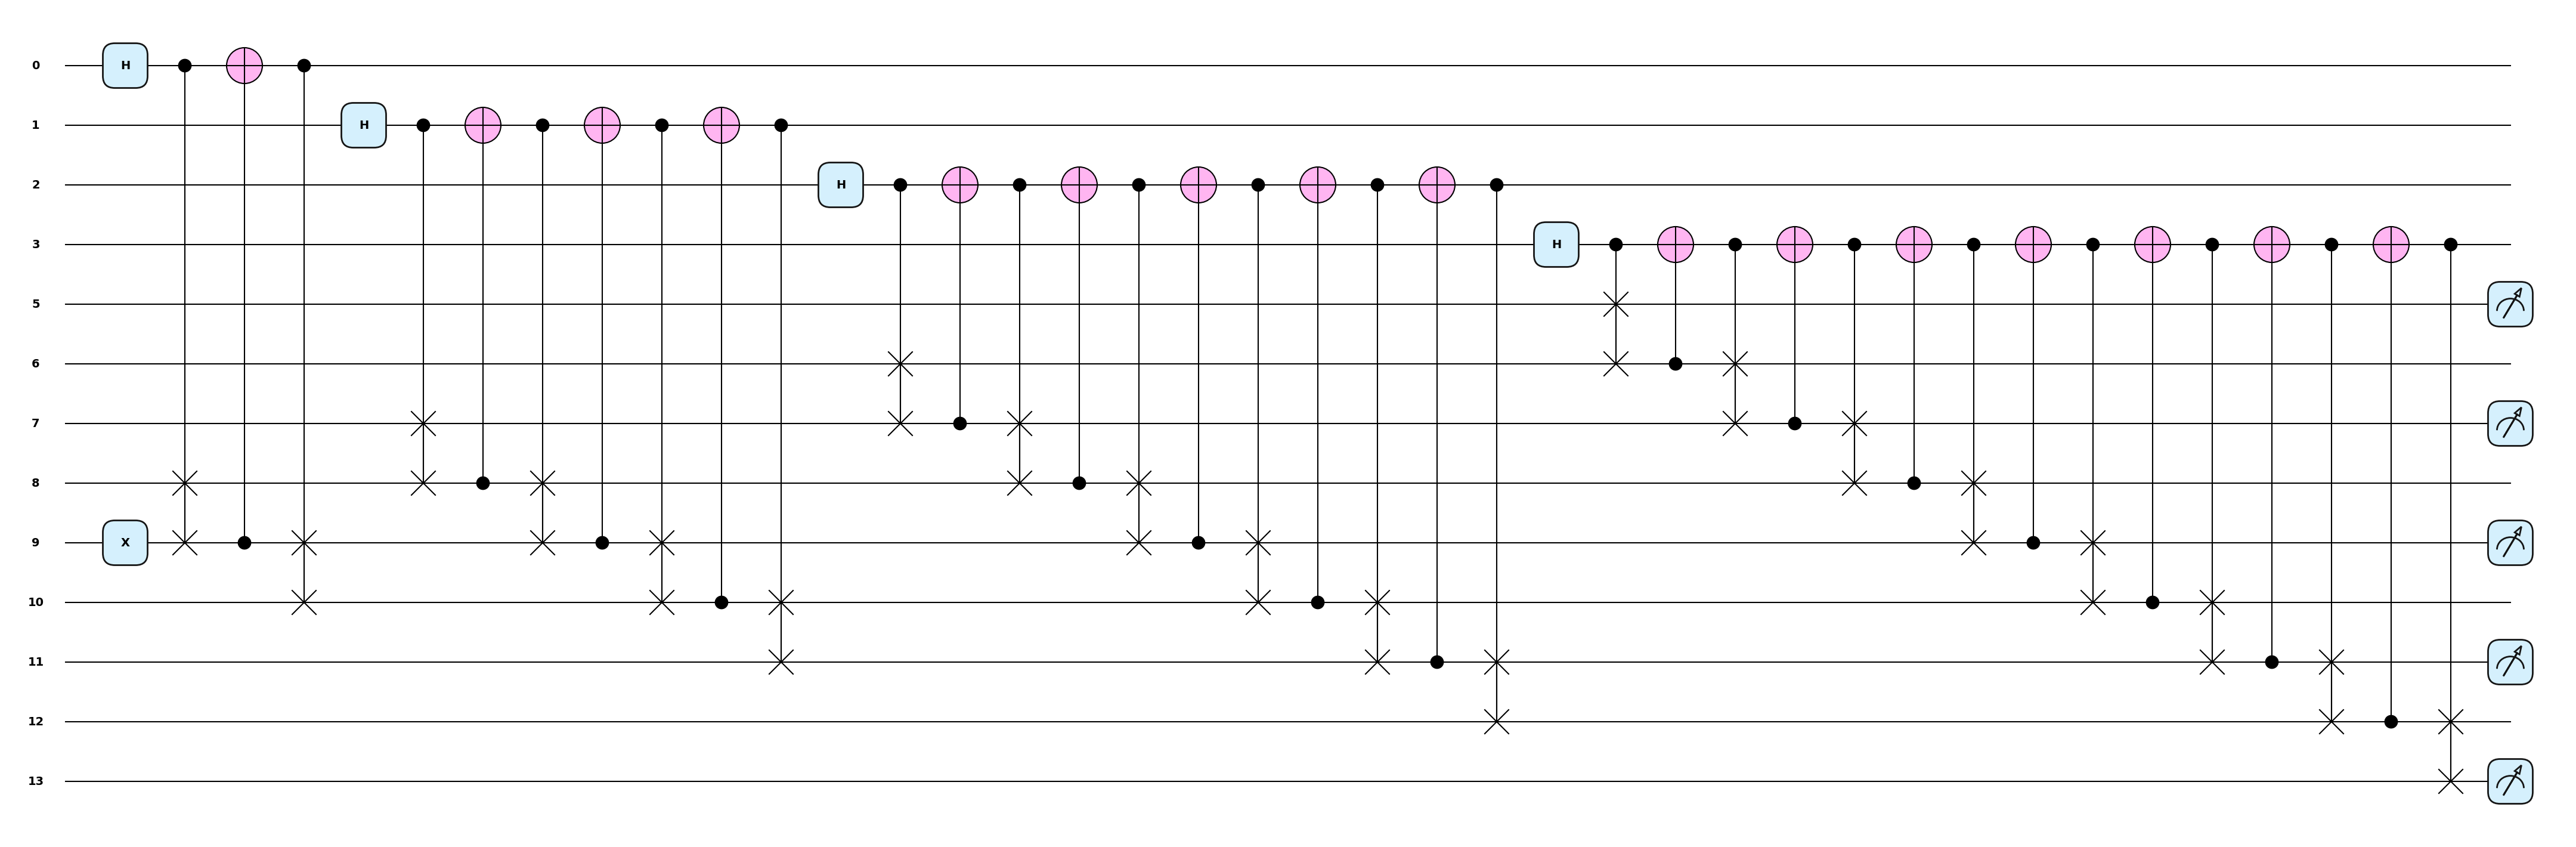

In [46]:
qml.draw_mpl(general_level_Galton_Box_E_I,style="pennylane")()

Measurement result

In [47]:
print("the Ideal result is :\n",general_level_Galton_Box_E_I())
print("the Noisy result is :\n",general_level_Galton_Box_E_N())

the Ideal result is :
 [0.     0.0625 0.25   0.     0.375  0.     0.     0.     0.25   0.
 0.     0.     0.     0.     0.     0.     0.0625 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]
the Noisy result is :
 [0.         0.06640625 0.26953125 0.         0.35546875 0.
 0.         0.         0.24609375 0.         0.         0.
 0.         0.         0.         0.         0.0625     0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


Ploting the data (Measurement)

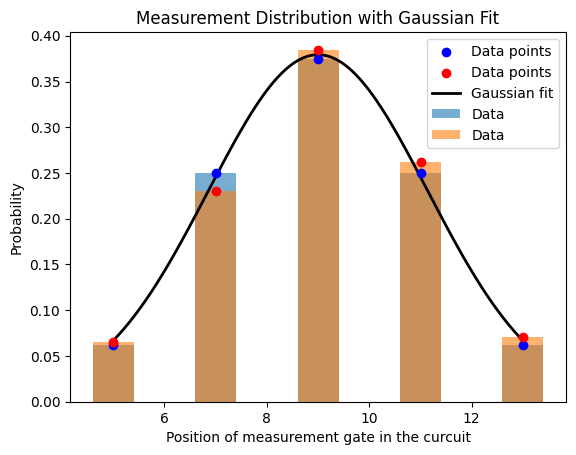

In [49]:
x_g_E=[i for i in range (n+1,3*n+2,2)] #number of measurement gates
y_g_E_I=[general_level_Galton_Box_E_I()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)
y_g_E_N=[general_level_Galton_Box_E_N()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = x_g_E[np.argmax(y_g_E_I)]
sigma_guess = (max(x_g_E) - min(x_g_E)) / 6
amp_guess = max(y_g_E_I)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    x_g_E,
    y_g_E_I,
    p0=initial_guess,
    bounds=([min(x_g_E), 0, 0], [max(x_g_E), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_g_E), max(x_g_E), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(x_g_E, y_g_E_I, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_g_E, y_g_E_I, color="blue", zorder=5, label="Data points")
plt.bar(x_g_E, y_g_E_N, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_g_E, y_g_E_N, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

##Modification

###Exponential distribution





It just shifts the distribution to the right (or to the left if the target is exponential decay). In other words, I used a biased probability distribution.

Building the curcuit

In [84]:
_E_theta = 0.2
E_theta = float(np.pi-_E_theta)  # if used a very small number instead of 0.4 the data obviously "by bare eyes" will blow and the exponential will not be noticed
                                 # is it almost pi, if it = pi it will give an single bar and the for e^(-x) E_theta = _E_theta
                                 # if you want a obvious exponential data points, increase the value of _E_theta "recommended value is 0.4"

def Exp_circuit():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
   qml.RX(E_theta,wires=[i])
   for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
   if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

Exp_circuit_I=qml.QNode(Exp_circuit,g_dev_E_Ideal)
Exp_circuit_N=qml.QNode(Exp_circuit,g_dev_E_Noisy)

Display the drawing of the circuit

(<Figure size 4300x1400 with 1 Axes>, <Axes: >)

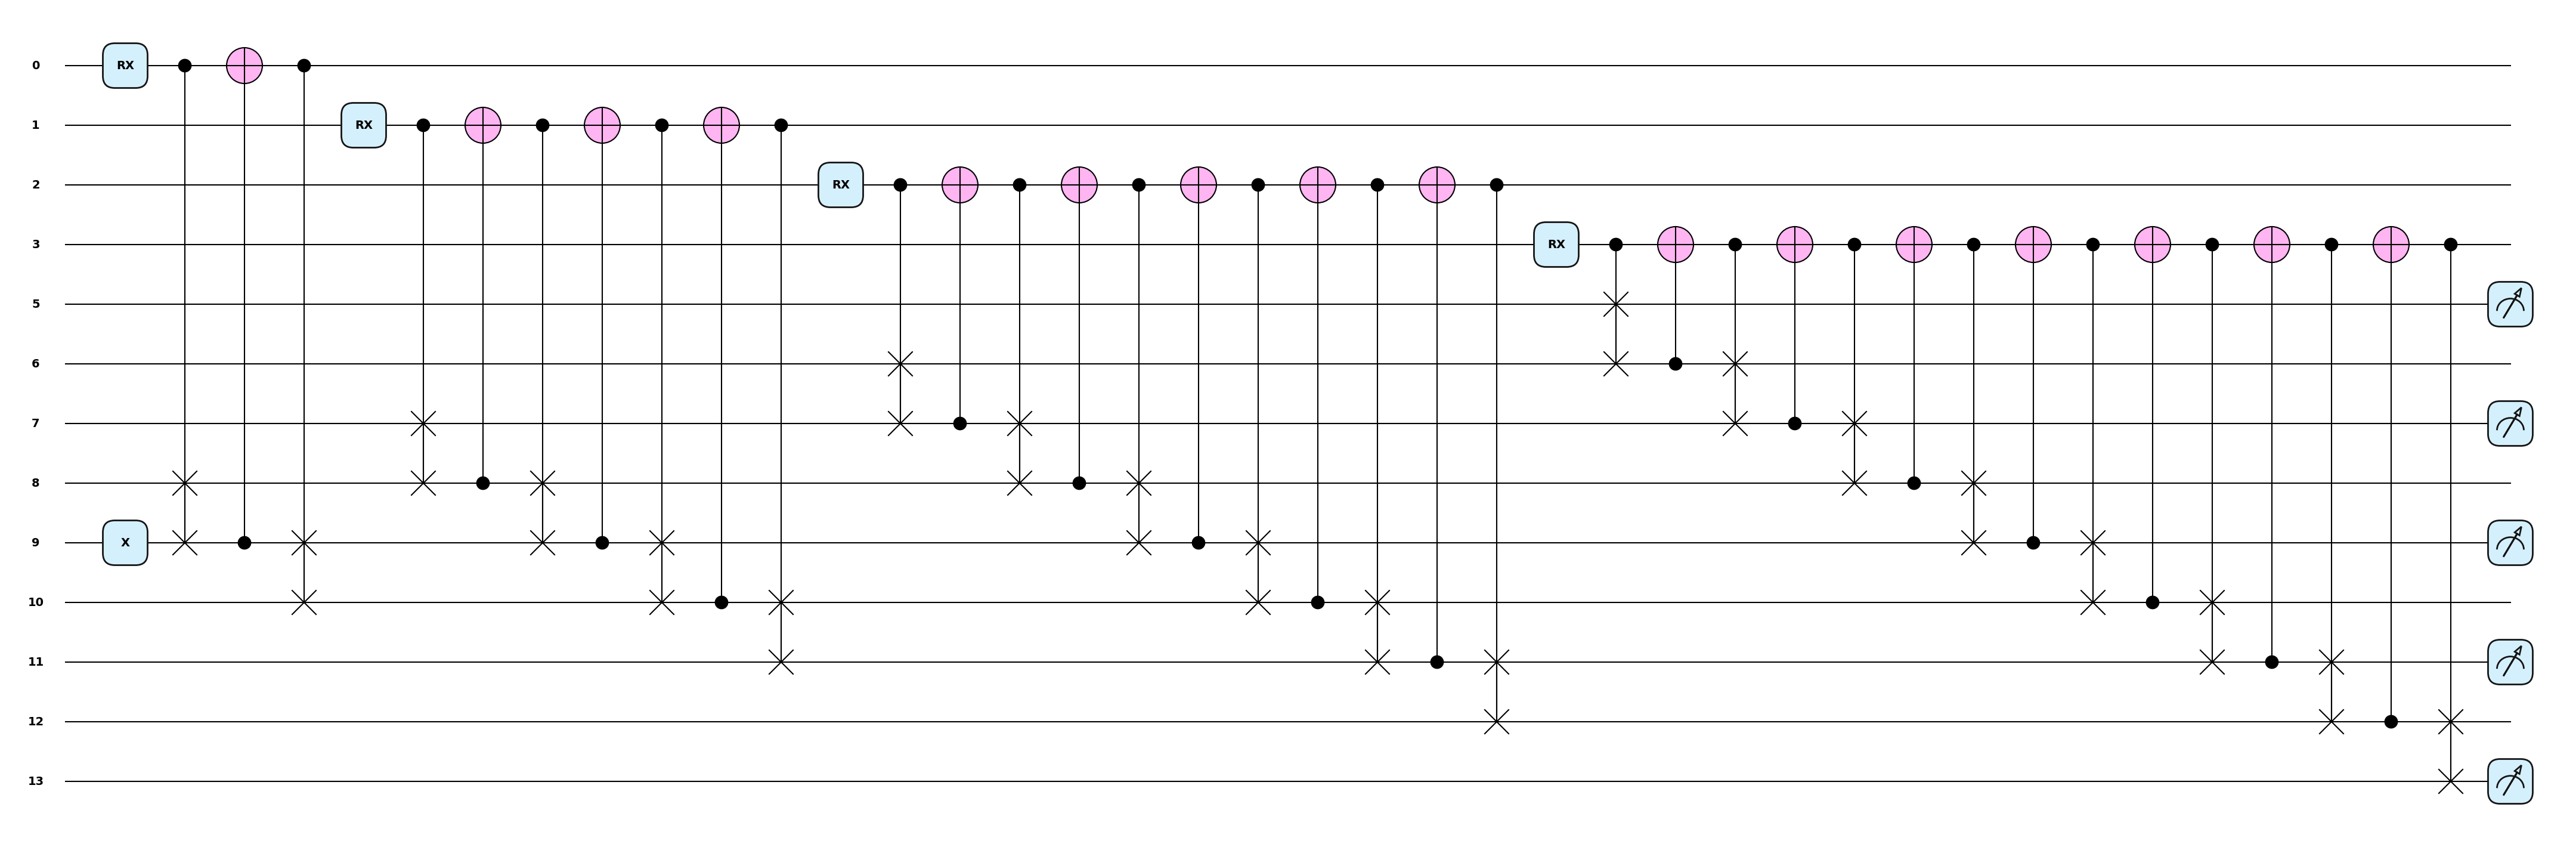

In [85]:
qml.draw_mpl(Exp_circuit_I,style="pennylane")()

Measurement result

In [86]:
print("the Ideal result is :\n",Exp_circuit_I())
print("the Noisy result is :\n",Exp_circuit_N())

the Ideal result is :
 [0.00000000e+00 9.86750773e-09 3.92071610e-06 0.00000000e+00
 5.84190625e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.86866614e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.60725217e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
the Noisy result is :
 [0.         0.         0.         0.         0.00097656 0.
 0.         0.         0.02832031 0.         0.         0.
 0.         0.         0.         0.         0.97070312 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


Ploting the data (Measurement)

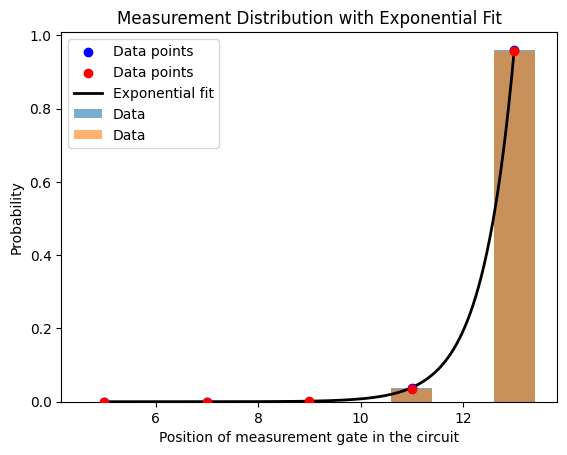

In [90]:
x_Exp_=[i for i in range (n+1,3*n+2,2)] #number of measurement gates
y_Exp_I_=[Exp_circuit_I()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)
y_Exp_N_=[Exp_circuit_N()[i] for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]] #rank of level in: (2**-->n<--)

x_Exp,y_Exp_I,y_Exp_N=[],[],[]
for i in range(len(y_Exp_I_)):
  if y_Exp_I !=0:
    y_Exp_I.append(y_Exp_I_[i])
    y_Exp_N.append(y_Exp_N_[i])
    x_Exp.append(x_Exp_[i])

# --- Example Exponential function ---
def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# --- Initial guess for fit ---
a_guess = max(y_Exp_I) - min(y_Exp_I)
b_guess = 0.1
if E_theta<np.pi/2:
  b_guess=-0.1
c_guess = min(y_Exp_I)
initial_guess = [a_guess, b_guess, c_guess]

# --- Fit Exponential ---
popt, _ = curve_fit(
    exponential,
    x_Exp,
    y_Exp_I,
    p0=initial_guess,
    bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]),
    maxfev=5000
)
a_fit, b_fit, c_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(x_Exp), max(x_Exp), 300)
y_fit = exponential(x_fit, a_fit, b_fit, c_fit)

# --- Plot ---
plt.bar(x_Exp, y_Exp_I, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_Exp, y_Exp_I, color="blue", zorder=5, label="Data points")
plt.bar(x_Exp, y_Exp_N, width=0.8, alpha=0.6, label="Data")
plt.scatter(x_Exp, y_Exp_N, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Exponential fit")

# Labels
plt.xlabel("Position of measurement gate in the circuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Exponential Fit")
plt.legend()
plt.show()

If theta = 0.4 the bar exponetial increament will be obvious, but the curve will not be completely fitted.

I have created a more controled shifting distribution in addition moddifications

###Hadamard quantum walk

####symmertic

To produce an equally distributed function, the first qubit (the middle one in the circuit) should also have a symmetric distribution. In other words, the final distribution depends on the state of the first qubit.



Building the curcuit

In [203]:
HW_I = qml.device("lightning.qubit", wires=2*n+1)
HW_N = qml.device("qrack.simulator", wires=2*n+1, shots=1024)

def Qwalk_s():
  coin=0
  repeat=n*50
  pos_qubits = list(range(1, 2*n))
  qml.Hadamard(wires=0)
  qml.S(wires=0)

  for _ in range(repeat):
      qml.Hadamard(wires=0)

      for i in range(len(pos_qubits), 0, -1):
          controls = [0] + pos_qubits[len(pos_qubits)-i+1:]
          target = pos_qubits[len(pos_qubits)-i]
          qml.MultiControlledX(wires=controls + [target])
          if i > 1:
            if i==1:
              continue
            qml.X(target+1)

      qml.X(0)
      for i in range( len(pos_qubits),0,-1):
          controls = [0] + pos_qubits[i:]
          target = pos_qubits[i-1]
          qml.MultiControlledX(wires=controls + [target])
          if i < len(pos_qubits)+1:
            if i==1:
              continue
            qml.X(target)
      qml.X(0)

  return qml.probs(wires=pos_qubits)

Qwalk_s_I=qml.QNode(Qwalk_s,HW_I)
Qwalk_s_N=qml.QNode(Qwalk_s,HW_I)

Display the drawing of the circuit

This will take a lot of time, because the big number of repeation of Hadamard function

In [194]:
qml.draw_mpl(Qwalk_s_I,style="pennylane")()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x78612f4ca980> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x78612f4c82c0> (for post_execute):


KeyboardInterrupt: 

Measurement result

In [199]:
print("the Ideal result is :\n",Qwalk_s_I())
print("the Noisy result is :\n",Qwalk_s_N())

the Ideal result is :
 [0.01374679 0.         0.01042872 0.         0.02221117 0.
 0.02482476 0.         0.02038974 0.         0.01828777 0.
 0.01719591 0.         0.03891236 0.         0.01043454 0.
 0.00907184 0.         0.01375022 0.         0.03821561 0.
 0.05134019 0.         0.02729347 0.         0.04468194 0.
 0.00113489 0.         0.00626034 0.         0.00590973 0.
 0.00395338 0.         0.01135018 0.         0.00635371 0.
 0.01473466 0.         0.01012147 0.         0.0099137  0.
 0.01705765 0.         0.00455328 0.         0.00862277 0.
 0.0078557  0.         0.00092858 0.         0.00898927 0.
 0.00828569 0.         0.01073312 0.         0.01866045 0.
 0.01073312 0.         0.00828569 0.         0.00898927 0.
 0.00092858 0.         0.0078557  0.         0.00862277 0.
 0.00455328 0.         0.01705765 0.         0.0099137  0.
 0.01012147 0.         0.01473466 0.         0.00635371 0.
 0.01135018 0.         0.00395338 0.         0.00590973 0.
 0.00626034 0.         0.00113489

Ploting the data (Measurement)

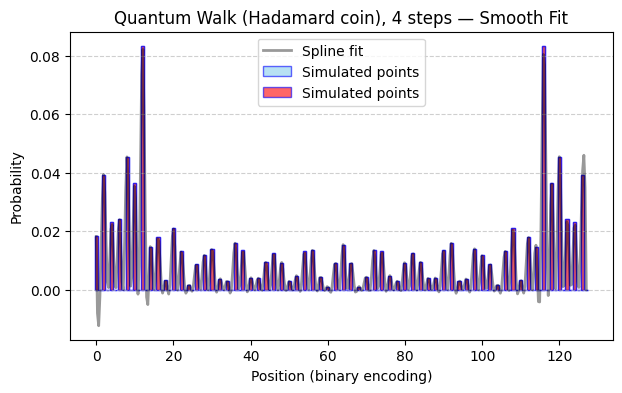

In [205]:
probs = Qwalk_s_I()
positions = np.arange(len(probs))

x_smooth = np.linspace(positions.min(), positions.max(), 400)
spline = make_interp_spline(positions, probs, k=3)
probs_smooth = spline(x_smooth)

plt.figure(figsize=(7,4))
plt.bar(positions, probs, color="skyblue", alpha=0.6, label="Simulated points")
plt.bar(positions, Qwalk_s_N(), color="red", alpha=0.6, label="Simulated points")
plt.plot(x_smooth, probs_smooth, color="black", linewidth=2, label="Spline fit", alpha=0.4)
plt.xlabel("Position (binary encoding)")
plt.ylabel("Probability")
plt.title(f"Quantum Walk (Hadamard coin), {n*50} steps — Smooth Fit")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

####Basied Hadamard walk

It just depends on the initial state of the coin (wires = [0]):

*   Hadamard gate followed by S gate:  symmetric (like an even function) distribution
*  I gate (no operation applied): shifts distribution to the right (state |1>, the active state)
*  X gate: shifts distribution to the left (state |0>, the passive state)



#####To Left

Building the curcuit

In [207]:
def Qwalk_l():
  coin=0
  repeat=n*50
  pos_qubits = list(range(1, 2*n))
  qml.X(wires=0)

  for _ in range(repeat):
      qml.Hadamard(wires=0)

      for i in range(len(pos_qubits), 0, -1):
          controls = [0] + pos_qubits[len(pos_qubits)-i+1:]
          target = pos_qubits[len(pos_qubits)-i]
          qml.MultiControlledX(wires=controls + [target])
          if i > 1:
            if i==1:
              continue
            qml.X(target+1)

      qml.X(0)
      for i in range( len(pos_qubits),0,-1):
          controls = [0] + pos_qubits[i:]
          target = pos_qubits[i-1]
          qml.MultiControlledX(wires=controls + [target])
          if i < len(pos_qubits)+1:
            if i==1:
              continue
            qml.X(target)
      qml.X(0)

  return qml.probs(wires=pos_qubits)

Qwalk_l_I=qml.QNode(Qwalk_l,HW_I)
Qwalk_l_N=qml.QNode(Qwalk_l,HW_I)

Display the drawing of the circuit

This will take a lot of time, because the big number of repeation of Hadamard function

(<Figure size 11600x900 with 1 Axes>, <Axes: >)

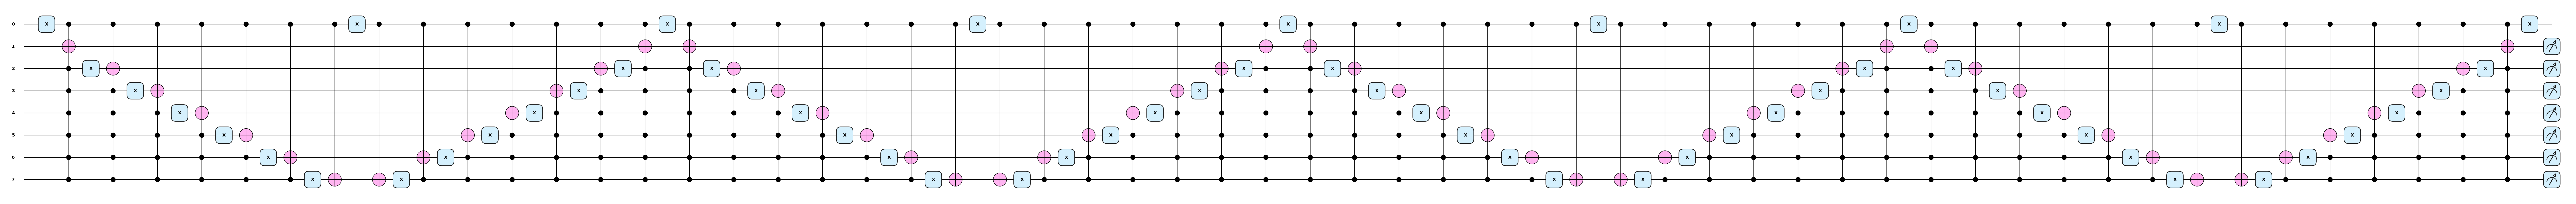

In [182]:
qml.draw_mpl(Qwalk_l_I,style="pennylane")()

Measurement result

In [208]:
print("the Ideal result is :\n",Qwalk_l_I())
print("the Noisy result is :\n",Qwalk_l_N())

the Ideal result is :
 [1.82223698e-02 0.00000000e+00 5.48440081e-02 0.00000000e+00
 1.19370134e-02 0.00000000e+00 2.85949592e-02 0.00000000e+00
 5.95893403e-02 0.00000000e+00 5.81405396e-02 0.00000000e+00
 1.08609231e-01 0.00000000e+00 2.50095192e-02 0.00000000e+00
 1.60100484e-02 0.00000000e+00 4.03391579e-03 0.00000000e+00
 1.26984976e-02 0.00000000e+00 7.77514765e-03 0.00000000e+00
 1.33104414e-03 0.00000000e+00 1.02184986e-02 0.00000000e+00
 1.32117523e-02 0.00000000e+00 3.86804046e-03 0.00000000e+00
 3.01897658e-04 0.00000000e+00 2.32856403e-03 0.00000000e+00
 1.12697096e-02 0.00000000e+00 1.28661489e-02 0.00000000e+00
 3.42677678e-03 0.00000000e+00 4.07245310e-03 0.00000000e+00
 1.32732336e-02 0.00000000e+00 1.17900546e-02 0.00000000e+00
 2.43889176e-03 0.00000000e+00 9.48212612e-04 0.00000000e+00
 8.70298798e-03 0.00000000e+00 1.39333690e-02 0.00000000e+00
 9.22630357e-03 0.00000000e+00 1.22383004e-03 0.00000000e+00
 2.11475862e-03 0.00000000e+00 1.16322673e-02 0.00000000e+00
 

Ploting the data (Measurement)

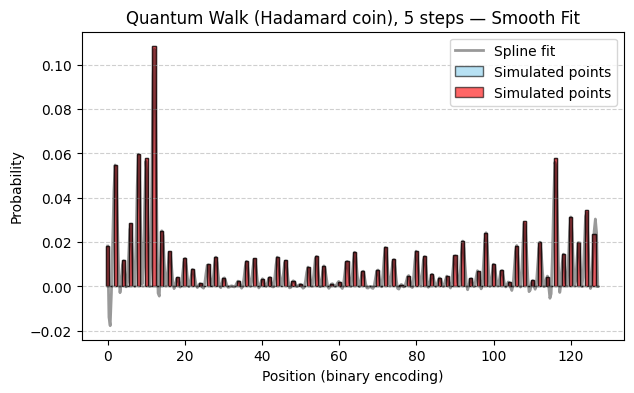

In [211]:
probs = Qwalk_l_I()
positions = np.arange(len(probs))

x_smooth = np.linspace(positions.min(), positions.max(), 400)
spline = make_interp_spline(positions, probs, k=3)
probs_smooth = spline(x_smooth)

plt.figure(figsize=(7,4))
plt.bar(positions, probs, color="skyblue", alpha=0.6, label="Simulated points")
plt.bar(positions, Qwalk_l_N(), color="red", alpha=0.6, label="Simulated points")
plt.plot(x_smooth, probs_smooth, color="black", linewidth=2, label="Spline fit", alpha=0.4)
plt.xlabel("Position (binary encoding)")
plt.ylabel("Probability")
plt.title(f"Quantum Walk (Hadamard coin), {n*50} steps — Smooth Fit")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

#####To Right

Building the curcuit

In [212]:
def Qwalk_r():
  coin=0
  repeat=n*50
  pos_qubits = list(range(1, 2*n))

  for _ in range(repeat):
      qml.Hadamard(wires=0)

      for i in range(len(pos_qubits), 0, -1):
          controls = [0] + pos_qubits[len(pos_qubits)-i+1:]
          target = pos_qubits[len(pos_qubits)-i]
          qml.MultiControlledX(wires=controls + [target])
          if i > 1:
            if i==1:
              continue
            qml.X(target+1)

      qml.X(0)
      for i in range( len(pos_qubits),0,-1):
          controls = [0] + pos_qubits[i:]
          target = pos_qubits[i-1]
          qml.MultiControlledX(wires=controls + [target])
          if i < len(pos_qubits)+1:
            if i==1:
              continue
            qml.X(target)
      qml.X(0)

  return qml.probs(wires=pos_qubits)

Qwalk_r_I=qml.QNode(Qwalk_r,HW_I)
Qwalk_r_N=qml.QNode(Qwalk_r,HW_I)

Display the drawing of the circuit

This will take a lot of time, because the big number of repeation of Hadamard function

(<Figure size 11500x900 with 1 Axes>, <Axes: >)

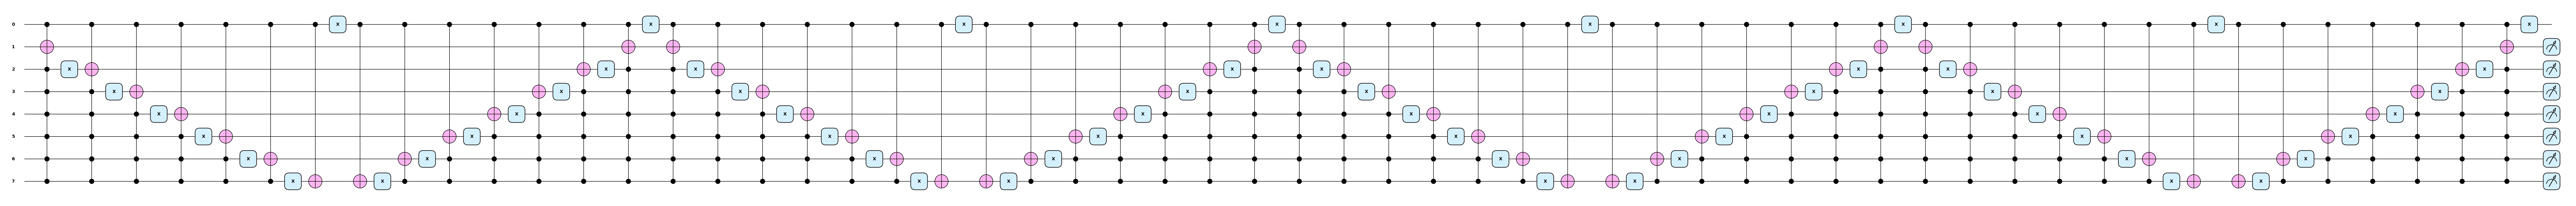

In [186]:
qml.draw_mpl(Qwalk_r_I,style="pennylane")()

Measurement result

In [213]:
print("the Ideal result is :\n",Qwalk_r_I())
print("the Noisy result is :\n",Qwalk_r_N())

the Ideal result is :
 [1.82223698e-02 0.00000000e+00 2.34866818e-02 0.00000000e+00
 3.45584081e-02 0.00000000e+00 2.00893188e-02 0.00000000e+00
 3.13432961e-02 0.00000000e+00 1.45620250e-02 0.00000000e+00
 5.81252375e-02 0.00000000e+00 4.33408020e-03 0.00000000e+00
 2.00774817e-02 0.00000000e+00 2.68608452e-03 0.00000000e+00
 2.93303996e-02 0.00000000e+00 1.84313942e-02 0.00000000e+00
 2.11106200e-03 0.00000000e+00 7.40667901e-03 0.00000000e+00
 1.03237187e-02 0.00000000e+00 2.43279686e-02 0.00000000e+00
 7.16934157e-03 0.00000000e+00 3.63109338e-03 0.00000000e+00
 2.05139641e-02 0.00000000e+00 1.43055291e-02 0.00000000e+00
 4.65503449e-03 0.00000000e+00 3.90568098e-03 0.00000000e+00
 5.42963809e-03 0.00000000e+00 1.36551958e-02 0.00000000e+00
 1.61634073e-02 0.00000000e+00 4.87380508e-03 0.00000000e+00
 8.35476128e-04 0.00000000e+00 1.22867995e-02 0.00000000e+00
 1.76610751e-02 0.00000000e+00 7.53094555e-03 0.00000000e+00
 7.09151895e-05 0.00000000e+00 7.01325835e-03 0.00000000e+00
 

Ploting the data (Measurement)

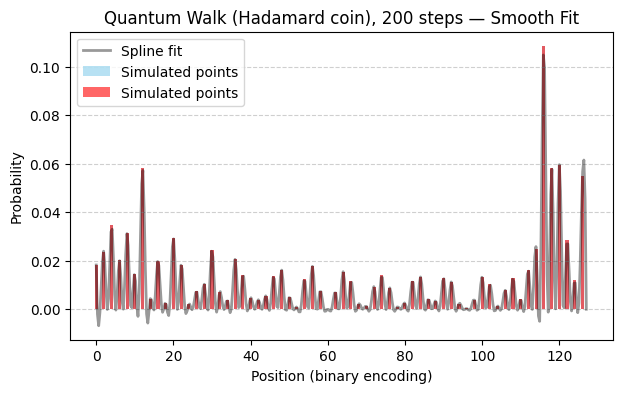

In [223]:
# Run the walk
probs = Qwalk_r_I()
positions = np.arange(len(probs))

# --- Spline interpolation for a smooth curve ---
x_smooth = np.linspace(positions.min(), positions.max(), 400)
spline = make_interp_spline(positions, probs, k=3)
probs_smooth = spline(x_smooth)

# --- Plot ---
plt.figure(figsize=(7,4))
plt.bar(positions, probs, color="skyblue", alpha=0.6, label="Simulated points")
plt.bar(positions, Qwalk_r_N(), color="red", alpha=0.6, label="Simulated points")
plt.plot(x_smooth, probs_smooth, color="black", linewidth=2, label="Spline fit", alpha=0.4)
plt.xlabel("Position (binary encoding)")
plt.ylabel("Probability")
plt.title(f"Quantum Walk (Hadamard coin), {n*50} steps — Smooth Fit")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

###Addition Moddifications

####Horizontally shift for the results




(right shift for positive value and left shift for negative value)  

Taking the value of value shifting


In [216]:
try:
  while(True):
      per_the= -float(input('Enter how far you want the distribution to shift: to the right (positive value) or to the left (negative value).\nYour range is [-100, 100].\nThe default value is zero (0).'))
      if (per_the<=100 and per_the>=-100):
        break
except ValueError:
  per_the=0

Enter how much do you want the distribution to go right (positive value) or left (negtive value) 
your range is [-100,100]
 "default value is zero (0)"
60


#####by Custom Untiary Gates

Creating Shifting Unitary Gates

In [220]:
a,b=100,100
if per_the >0:
  a+=per_the
  b-=per_the
elif per_the <0:
  b-=per_the
  a+=per_the

#normalization
temp_a,temp_b=a,b
a = 1/((abs(temp_a)**2+abs(temp_b)**2)**(1/2)) * a
b = 1/((abs(temp_a)**2+abs(temp_b)**2)**(1/2)) * b

H_Hadamard=np.array([[a,a],[b,-b]])


print("the shape of the Unitary Matrix (Operator):\n",H_Hadamard)

the shape of the Unitary Matrix (Operator):
 [[ 0.24253563  0.24253563]
 [ 0.9701425  -0.9701425 ]]


Building the curcit

In [231]:
def h_circuit_U():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
    qml.QubitUnitary(H_Hadamard,wires=[i])
    for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
    if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

h_circuit_U_I=qml.QNode(h_circuit_U,g_dev_E_Ideal)
h_circuit_U_N=qml.QNode(h_circuit_U,g_dev_E_Noisy)

Display the drawing of the circuit

(<Figure size 4300x1400 with 1 Axes>, <Axes: >)

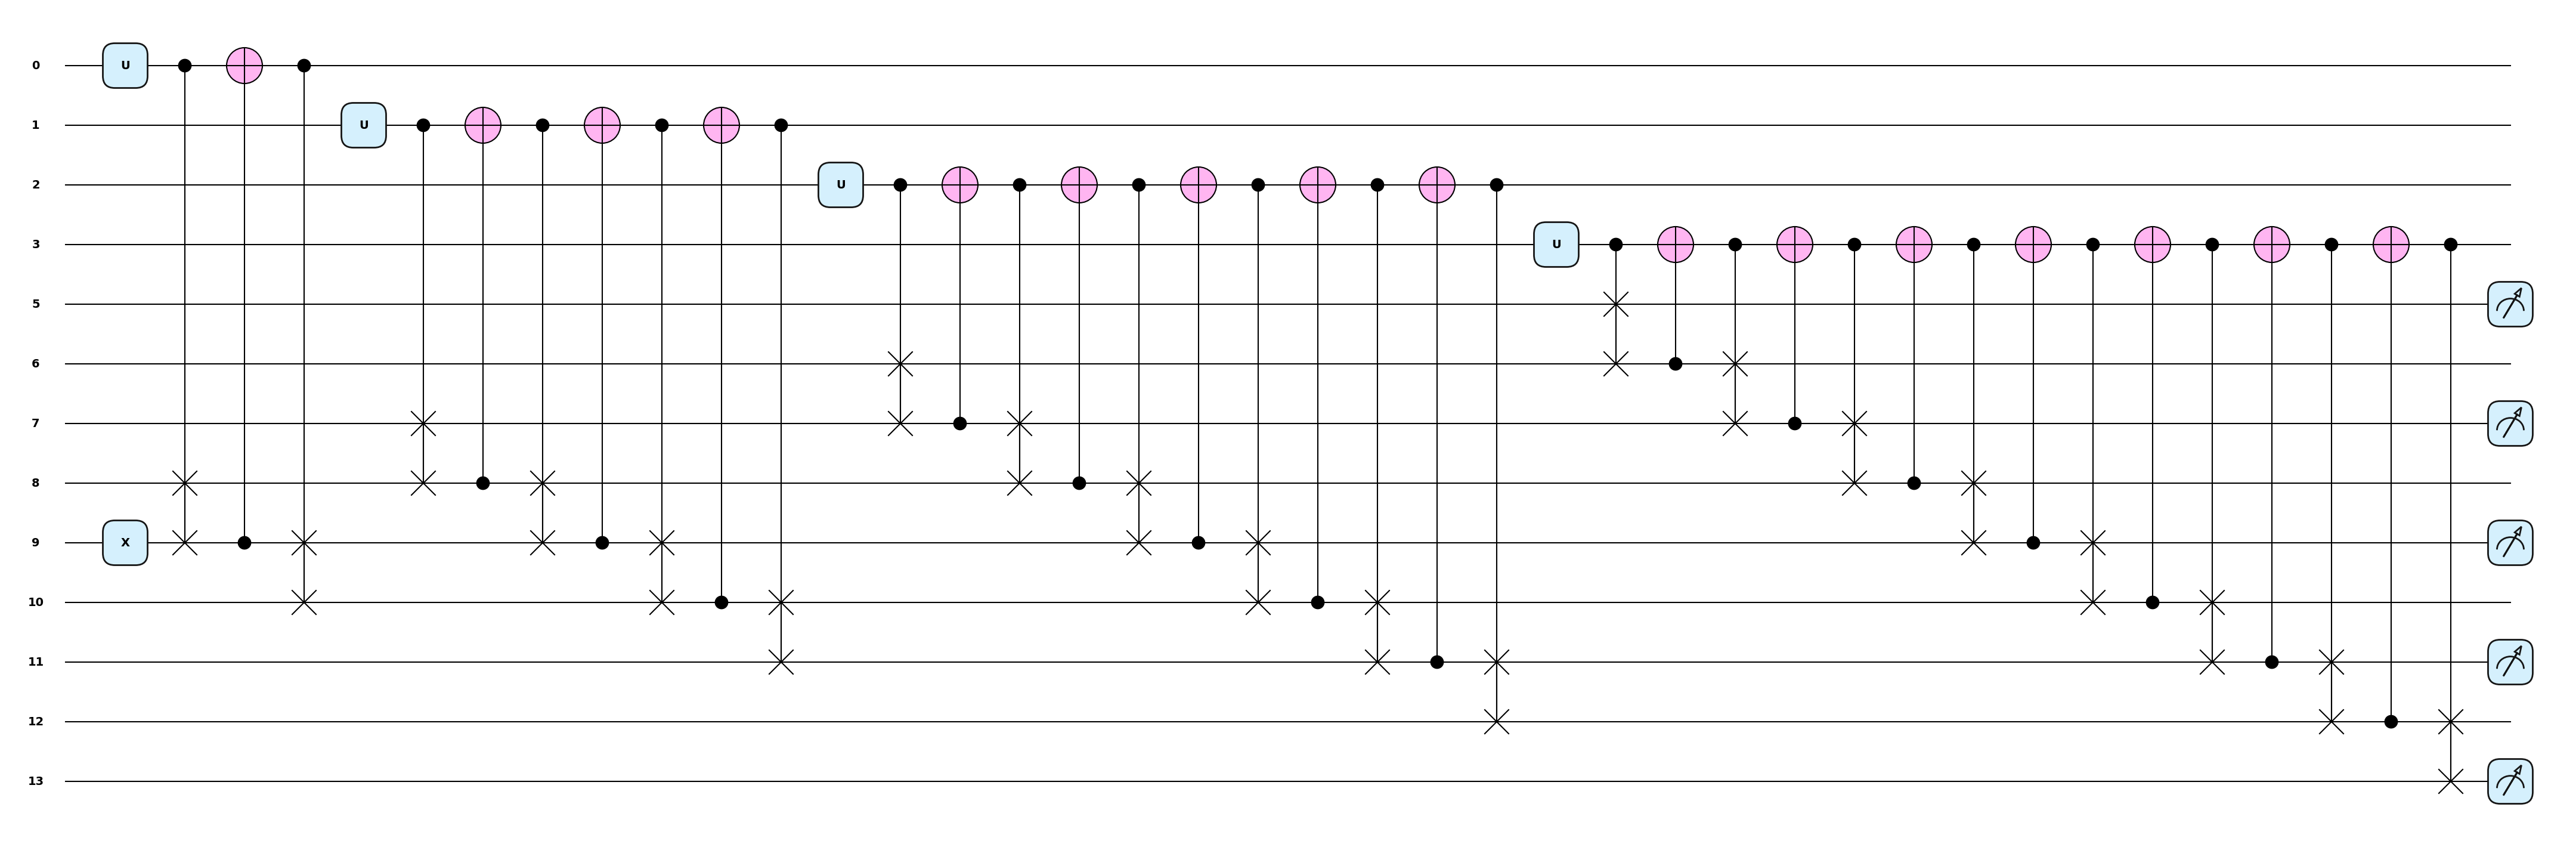

In [232]:
qml.draw_mpl(h_circuit_U_I,style="pennylane")()

Measurement result

In [229]:
print("the Ideal result is :\n",h_circuit_U_I())
print("the Noisy result is :\n",h_circuit_U_N())

the Ideal result is :
 [0.00000000e+00 1.19730367e-05 7.66274350e-04 0.00000000e+00
 1.83905844e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.96166234e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.84664935e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
the Noisy result is :
 [0.         0.7890625  0.18847656 0.         0.02148438 0.
 0.         0.         0.00097656 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


Ploting the data (Measurement)

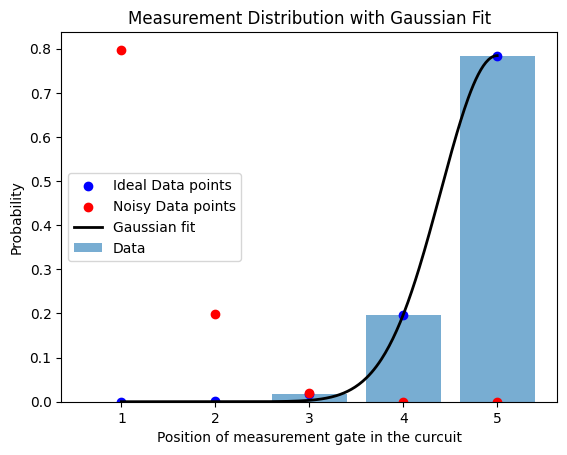

In [236]:
hx=[]
hy,hy_n=[],[]
temp=0
for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]:
   if h_circuit_U_I()[i]!=0:
     temp+=1
     hx.append(temp)
     hy.append(h_circuit_U_I()[i])
     hy_n.append(h_circuit_U_N()[i])

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = hx[np.argmax(hy)]
sigma_guess = (max(hx) - min(hx)) / 6
amp_guess = max(hy)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    hx,
    hy,
    p0=initial_guess,
    bounds=([min(hx), 0, 0], [max(hx), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(hx), max(hx), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(hx, hy, width=0.8, alpha=0.6, label="Data")
plt.scatter(hx, hy, color="blue", zorder=5, label="Ideal Data points")
plt.scatter(hx, hy_n, color="red", zorder=5, label="Noisy Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

#####by Angle Shift


In [237]:
if per_the ==100:
  per_the-=1e-999
elif per_the == -100  :
  per_the+=1e-999

def h_circuit_A():
  para=3*n
  mid=2*n+1
  qml.X(wires=[mid])
  for i in range(para):
    qml.RX(np.pi/2*(1-(per_the/100)),wires=[i])
    for j in range(-i,i+1):
      qml.CSWAP((i,mid+j,mid+j-1))
      qml.CNOT(wires=[mid+j,i])
      if j==i:
         qml.CSWAP((i,mid+j,mid+j+1))
    if i==n-1:
         break

  result=()
  for i in range (n+1,3*n+2,2):
    result+=(i,)

  return qml.probs(result)

h_circuit_A_I=qml.QNode(h_circuit_A,g_dev_E_Ideal)
h_circuit_A_N=qml.QNode(h_circuit_A,g_dev_E_Noisy)

Display the drawing of the circuit

(<Figure size 4300x1400 with 1 Axes>, <Axes: >)

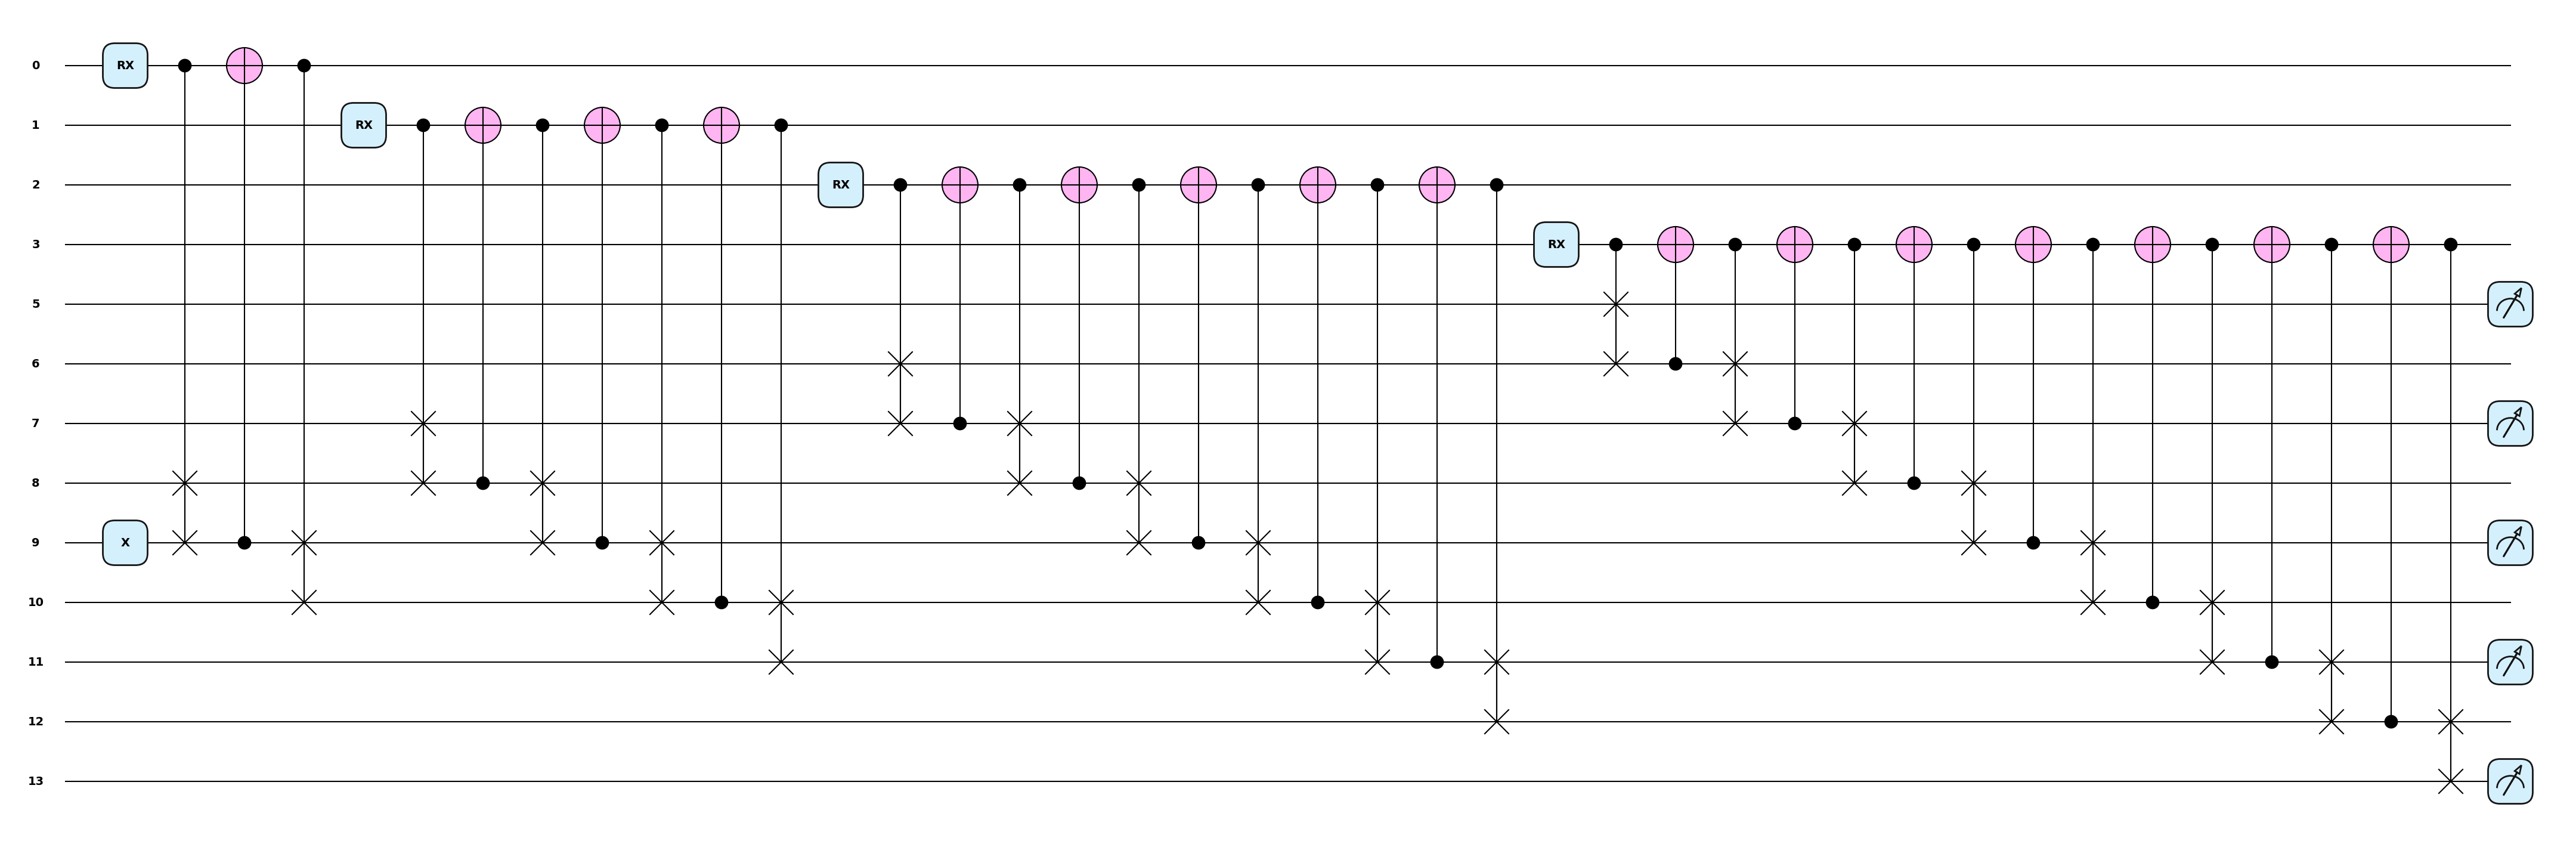

In [238]:
qml.draw_mpl(h_circuit_A_I,style="pennylane")()

Measurement result

In [239]:
h_circuit_A_I()

array([0.00000000e+00, 8.31493604e-05, 3.15040818e-03, 0.00000000e+00,
       4.47616419e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.82658905e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.69345895e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

Ploting the data (Measurement)

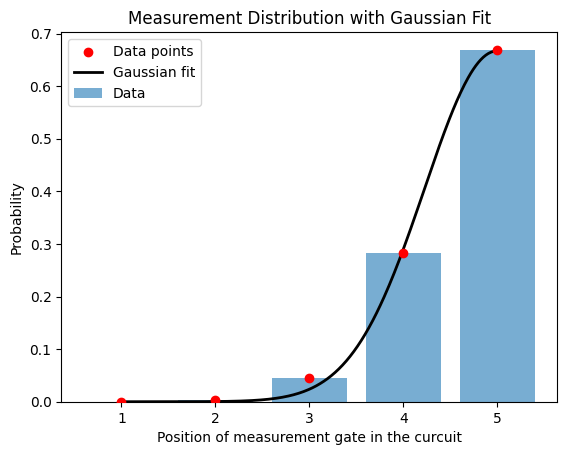

In [240]:
hx_a=[]
hy_a,hy_a_n=[],[]
temp=0
for i in [2**j for j in range(int(math.log(2**n, 2)) + 1)]:
   if h_circuit_A_()[i]!=0:
     temp+=1
     hx_a.append(temp)
     hy_a.append(h_circuit_A_I()[i])
     hy_a_n.append(h_circuit_A_N()[i])

# --- Example Gaussian function ---
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu)**2 / (2 * sigma**2))

# --- Initial guess for fit ---
mu_guess = hx_a[np.argmax(hy_a)]
sigma_guess = (max(hx_a) - min(hx_a)) / 6
amp_guess = max(hy_a)
initial_guess = [mu_guess, sigma_guess, amp_guess]

# --- Fit Gaussian ---
popt, _ = curve_fit(
    gaussian,
    hx_a,
    hy_a,
    p0=initial_guess,
    bounds=([min(hx_a), 0, 0], [max(hx_a), np.inf, np.inf]),
    maxfev=5000
)
mu_fit, sigma_fit, amp_fit = popt

# --- Smooth x-values for curve ---
x_fit = np.linspace(min(hx_a), max(hx_a), 300)
y_fit = gaussian(x_fit, mu_fit, sigma_fit, amp_fit)

# --- Plot ---
plt.bar(hx_a, hy_a, width=0.8, alpha=0.6, label="Data")
plt.scatter(hx_a, hy_a, color="red", zorder=5, label="Data points")
plt.plot(x_fit, y_fit, color="black", linewidth=2, label="Gaussian fit")

# Labels
plt.xlabel("Position of measurement gate in the curcuit")
plt.ylabel("Probability")
plt.title("Measurement Distribution with Gaussian Fit")
plt.legend()
plt.show()

##Incorrect Way To Make Curcit, But edited it to give the same result


I misordered the CNOT gate between the controlled and taget qubits, so I notice instead of counting on chosing only one actived Qubit ( |1> ) in the entaglment state chossing how many active Qubit, the more number of active state

What is the benfit from it? That replacing missing of reset gate in Pennylane and use one control Qubit instead of n number (number of layers) of Controled Qubit



**Notice:** this step isn't simulation for Galton Box anymore, but sill a randomness generator

In [266]:
dev = qml.device ("default.qubit", wires = 2*n+3)#, shots=1024)
@qml.qnode(dev)

def circuit2():
  mid=n+2
  qml.X(wires=[mid])
  for i in range(n):
    qml.Hadamard(0)
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      qml.CNOT(wires=[0,mid+j])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))

  result=()
  for i in range (2,2*n+3,2):
    result+=(i,)

  return qml.probs(result)


(<Figure size 4300x1100 with 1 Axes>, <Axes: >)

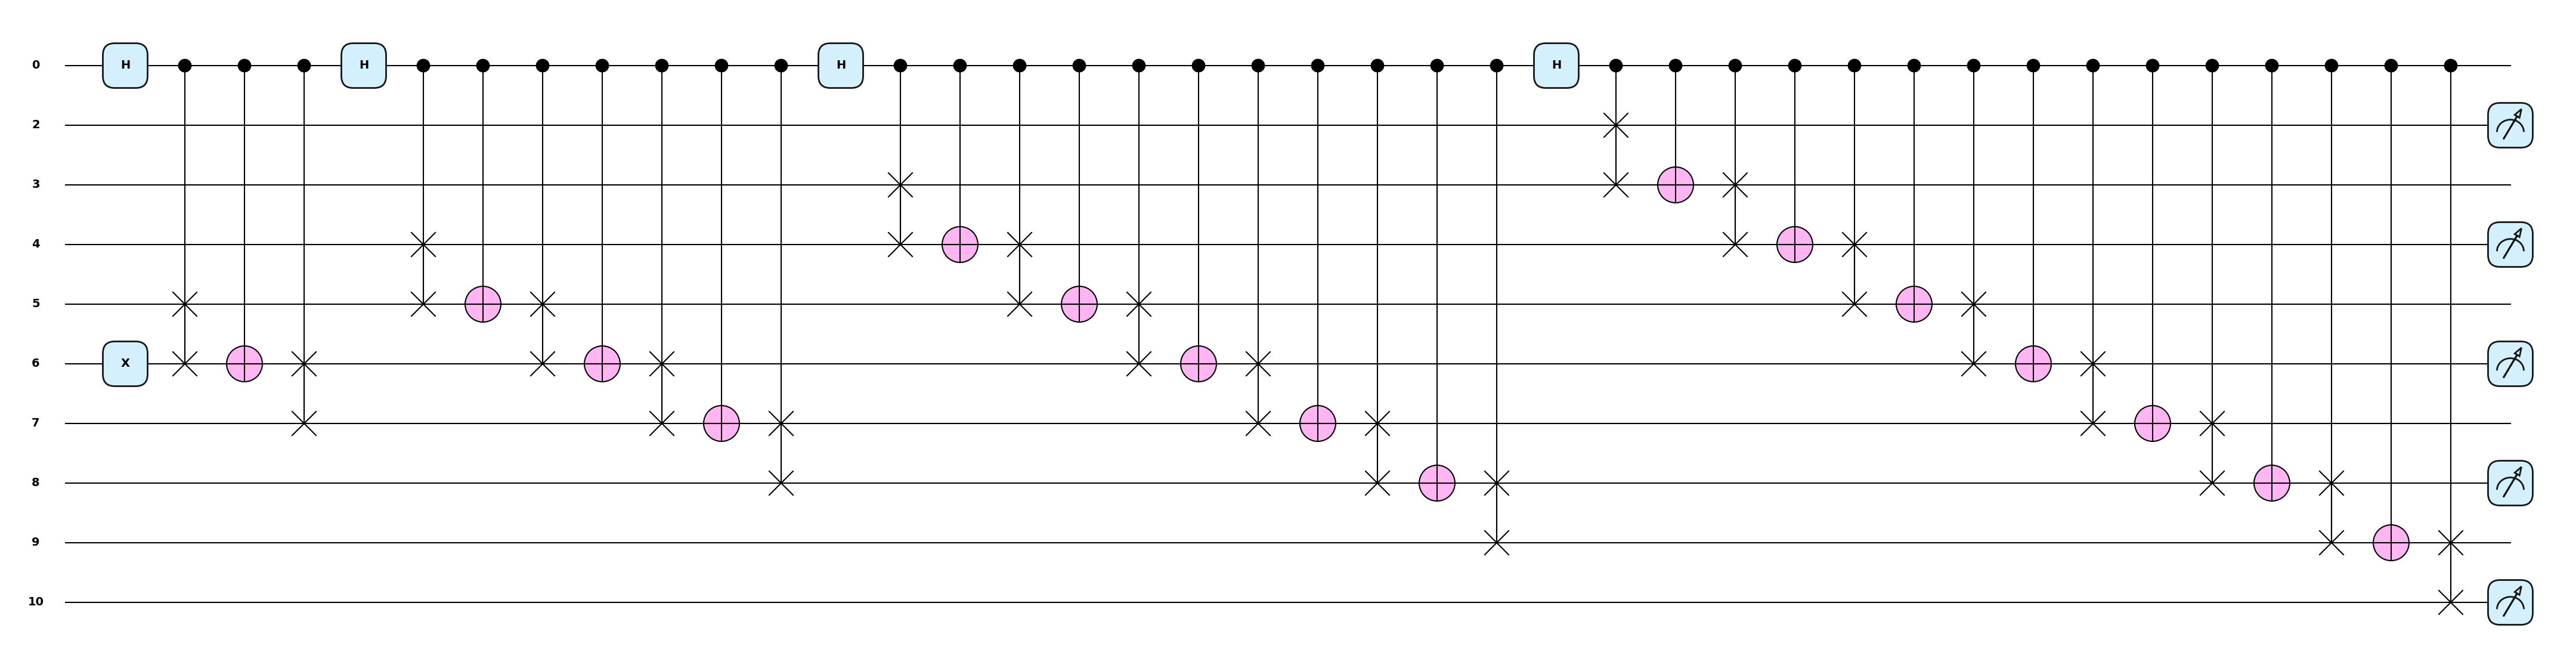

In [267]:
qml.draw_mpl(circuit2,style="pennylane")()

In [268]:
circuit2()

array([0.1875, 0.125 , 0.0625, 0.0625, 0.0625, 0.    , 0.    , 0.0625,
       0.0625, 0.0625, 0.    , 0.0625, 0.0625, 0.0625, 0.0625, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0625])

In [269]:
nums_of_measurements = n+2
repeataion=[]
for j in range(nums_of_measurements):
  repeataion.append(0)

for i in range(len(circuit2())):
    binary = format(i, f'0{nums_of_measurements}b')
    count_ones = binary.count('1')
    repeataion[count_ones]+=1



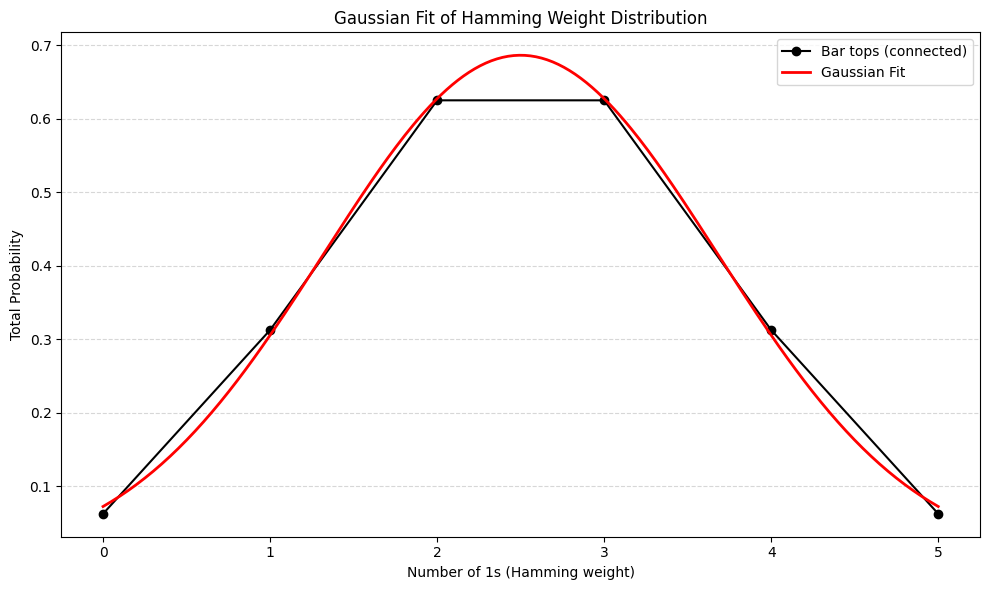

In [271]:
x=[]
y=[]
for i in range(nums_of_measurements):
  x.append(i)
  y.append(repeataion[i]/(2**n))



# plt.bar(x, y)
# # plt.bar(x, y, color="skyblue")
# plt.xlabel("Number of 1s (Hamming weight)")
# plt.ylabel("Total Probability")
# plt.title("Probability Distribution by Hamming Weight")
# # plt.xticks(range(num_qubits + 1))
# plt.grid(True, axis='y', linestyle='--', alpha=0.5)

from scipy.optimize import curve_fit
def gaussian(x, mu, sigma, amplitude):
    return amplitude * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# Initial guess: center ≈ mean of x, width ≈ std dev, amplitude ≈ max(y)
initial_guess = [np.mean(x), np.std(x), max(y)]
popt, _ = curve_fit(gaussian, x, y, p0=initial_guess)
mu_fit, sigma_fit, amp_fit = popt

# Smooth fitted curve
x_dense = np.linspace(min(x), max(x), 300)
gaussian_curve = gaussian(x_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', color='black', label="Bar tops (connected)")
plt.plot(x_dense, gaussian_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

###Hadamard walk

###right peak


In [ ]:
dev = qml.device ("default.qubit", wires = 2*n+3)#, shots=1024)

@qml.qnode(dev)

def circuit2():
  mid=n+2
  # qml.X(wires=[mid])
  for i in range(1,2*n+3):
    qml.X(wires=[i])
  for i in range(n):
    qml.Hadamard(0)
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      qml.CNOT(wires=[0,mid+j])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))

  result=()
  for i in range (2,2*n+3,2):
    result+=(i,)

  return qml.probs(result)


(<Figure size 4300x1300 with 1 Axes>, <Axes: >)

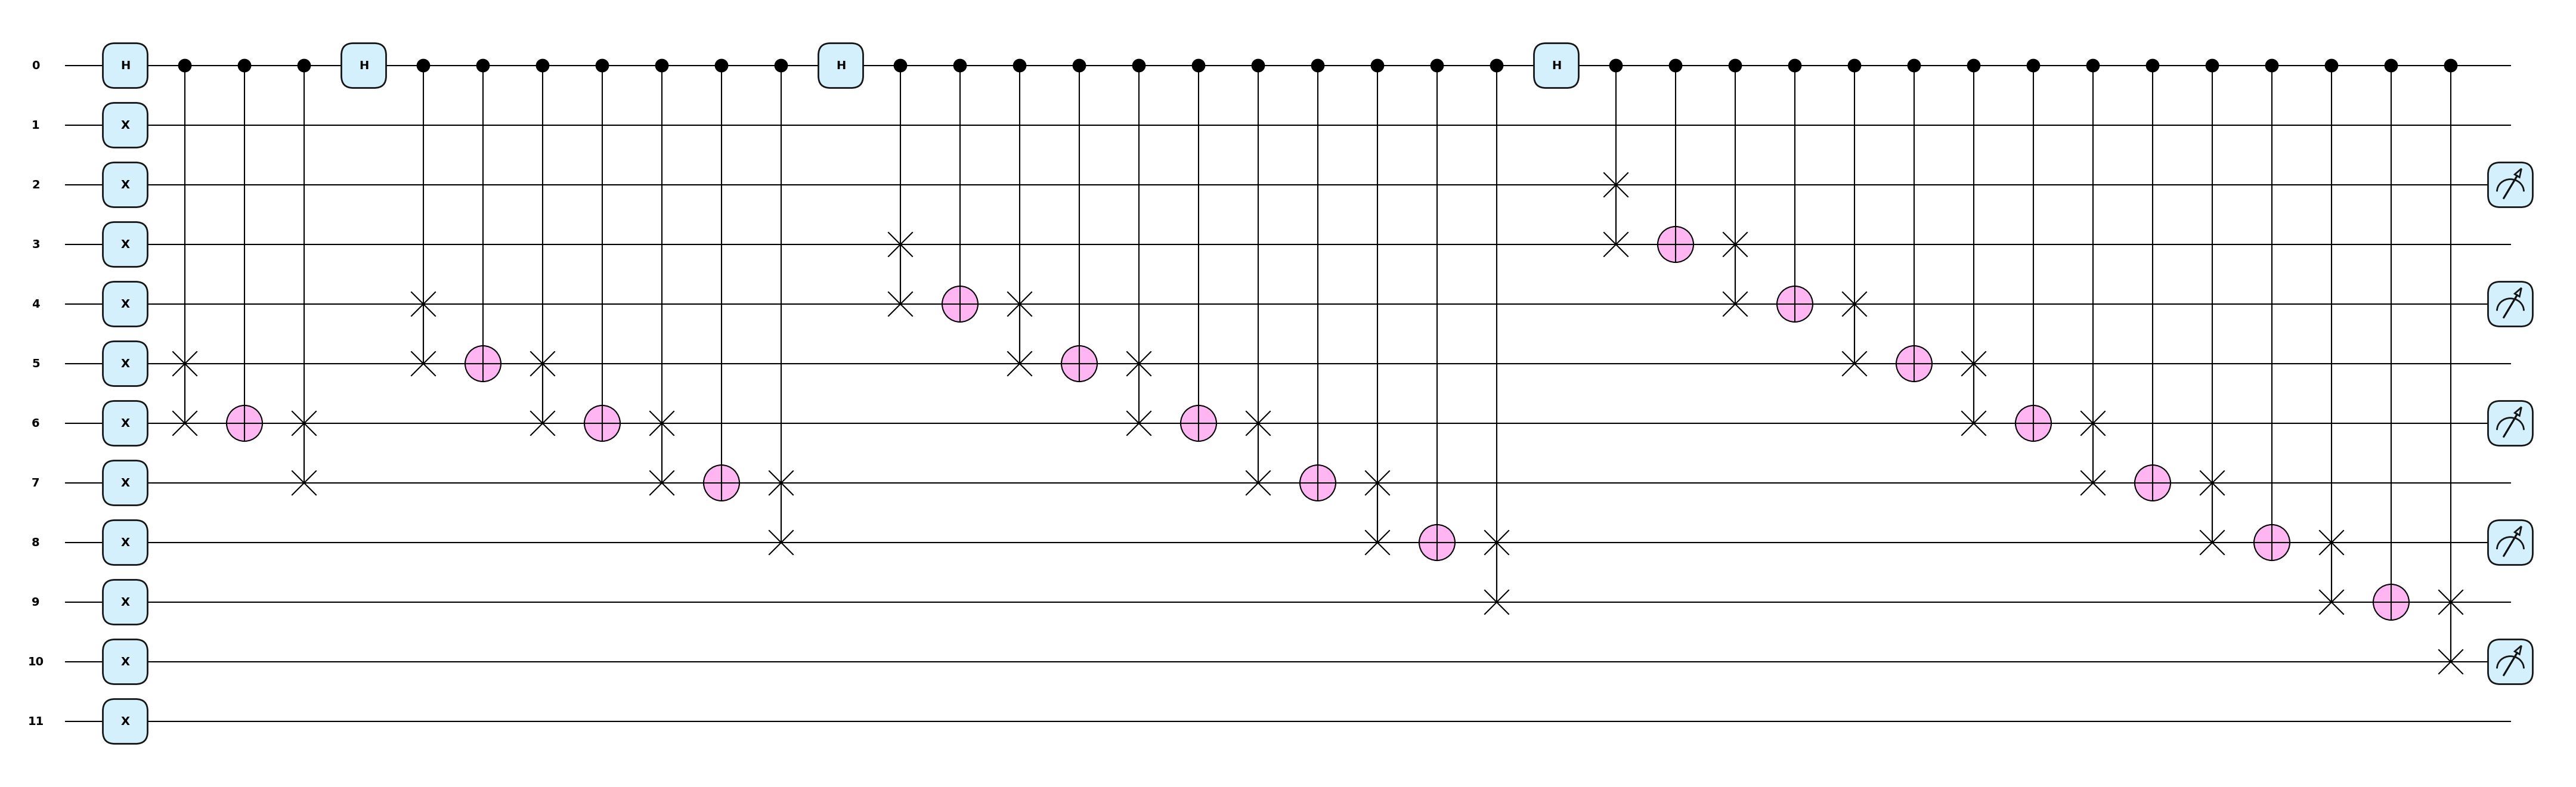

In [ ]:
qml.draw_mpl(circuit2,style="pennylane")()

In [ ]:
circuit2()

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.0625, 0.0625, 0.0625, 0.125 , 0.0625, 0.1875, 0.3125])

In [ ]:
nums_of_measurements = n+2
repeataion=[]
for j in range(nums_of_measurements):
  repeataion.append(0)

for i in range(len(circuit2())):
    binary = format(i, f'0{nums_of_measurements}b')
    count_ones = binary.count('1')
    repeataion[count_ones]+=1



IndexError: list index out of range

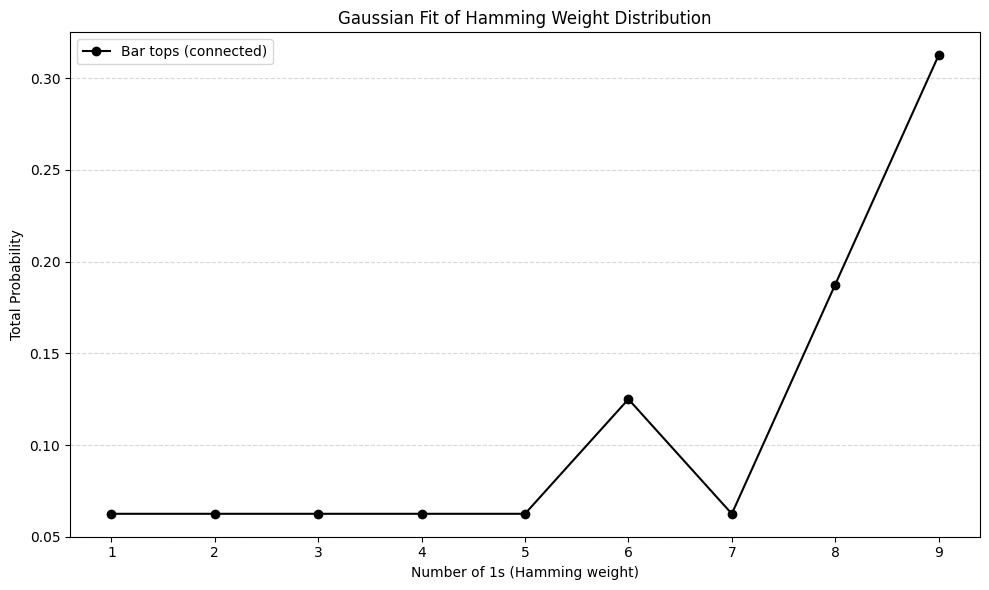

In [ ]:
x = []
y = []
sum_count = 0

# Collect data from circuit2()
for i in circuit2():
    if i != 0:
        y.append(i)
        sum_count += 1
        x.append(sum_count)

# # Gaussian function
# def gaussian(x, mu, sigma, amplitude):
#     return amplitude * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# # Initial guess for parameters
# initial_guess = [np.mean(x), np.std(x), max(y)]

# # Fit Gaussian with bounds and higher maxfev
# popt, _ = curve_fit(
#     gaussian,
#     x,
#     y,
#     p0=initial_guess,
#     bounds=([min(x), 0, 0], [max(x), np.inf, np.inf]),
#     maxfev=10000
# )
# mu_fit, sigma_fit, amp_fit = popt

# # Smooth fitted curve
# x_dense = np.linspace(min(x), max(x), 300)
# gaussian_curve = gaussian(x_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', color='black', label="Bar tops (connected)")
# plt.plot(x_dense, gaussian_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###left peak

In [261]:
dev = qml.device ("default.qubit", wires = 2*n+3)#, shots=1024)

@qml.qnode(dev)

def circuit2():
  mid=n+2
  # qml.X(wires=[mid])
  # for i in range(1,2*n+3):
  #   qml.X(wires=[i])
  for i in range(n):
    qml.Hadamard(0)
    for j in range(-i,i+1):
      qml.CSWAP((0,mid+j,mid+j-1))
      qml.CNOT(wires=[0,mid+j])
      if j==i:
         qml.CSWAP((0,mid+j,mid+j+1))

  result=()
  for i in range (2,2*n+3,2):
    result+=(i,)

  return qml.probs(result)


(<Figure size 4300x1100 with 1 Axes>, <Axes: >)

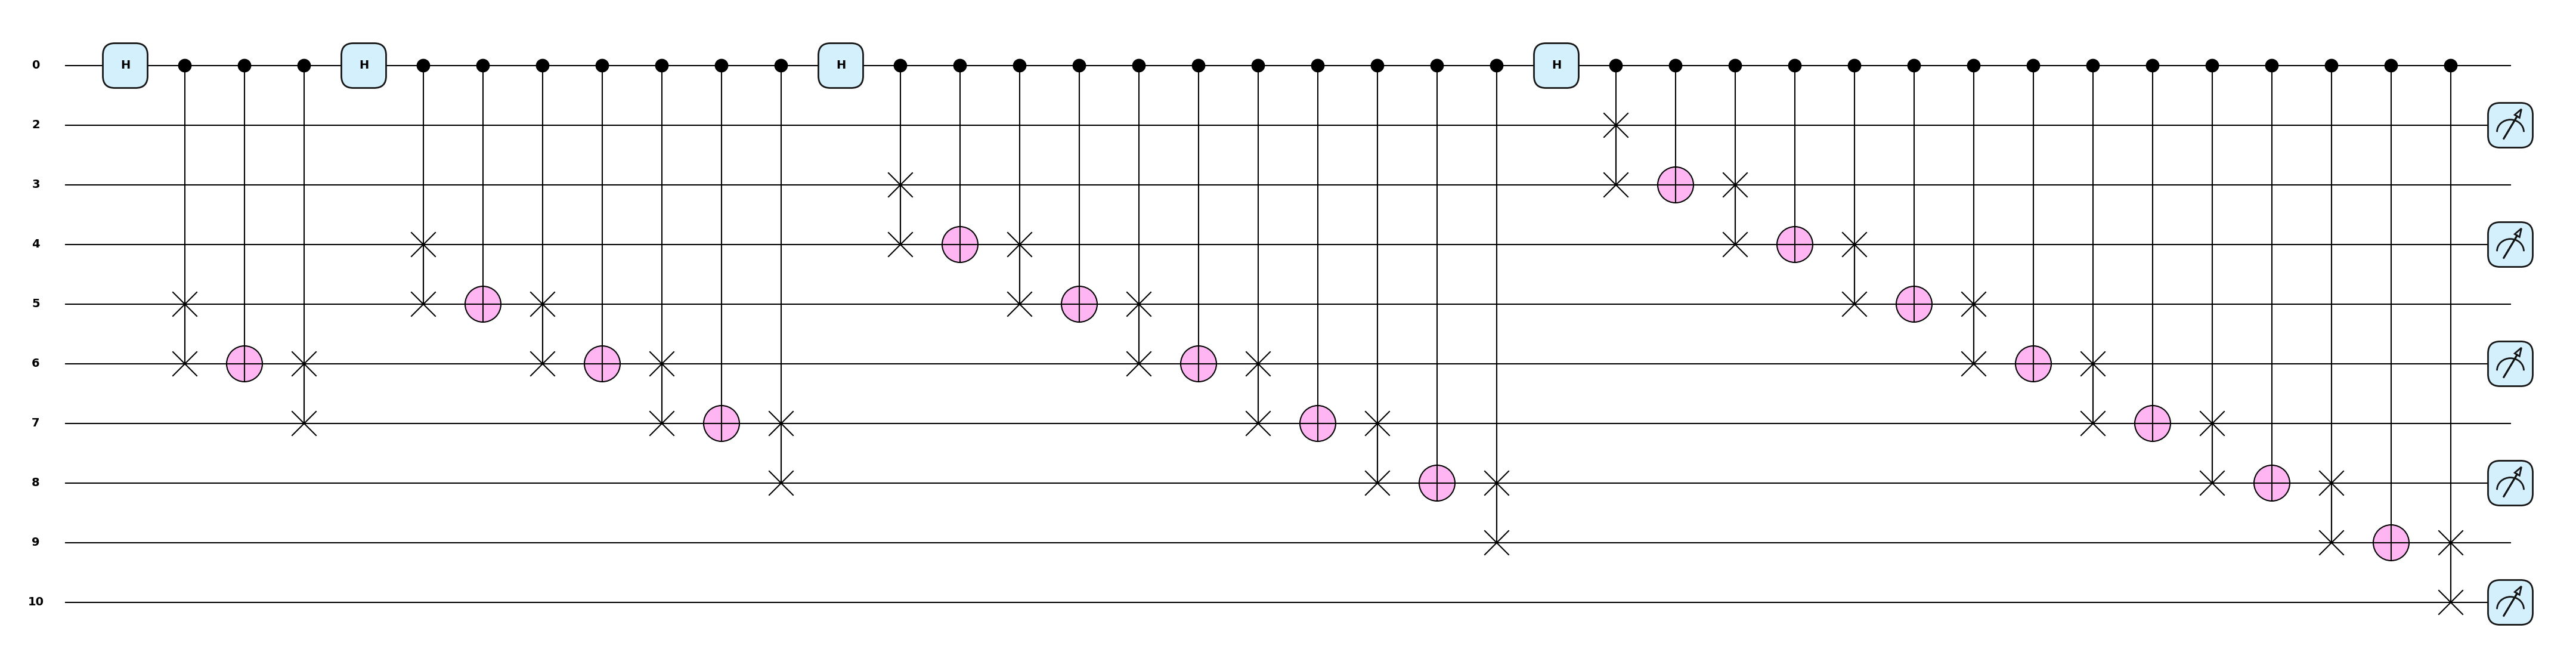

In [262]:
qml.draw_mpl(circuit2,style="pennylane")()

In [263]:
circuit2()

array([0.3125, 0.1875, 0.0625, 0.125 , 0.0625, 0.0625, 0.0625, 0.0625,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0625,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [264]:
nums_of_measurements = n+2
repeataion=[]
for j in range(nums_of_measurements):
  repeataion.append(0)

for i in range(len(circuit2())):
    binary = format(i, f'0{nums_of_measurements}b')
    count_ones = binary.count('1')
    repeataion[count_ones]+=1



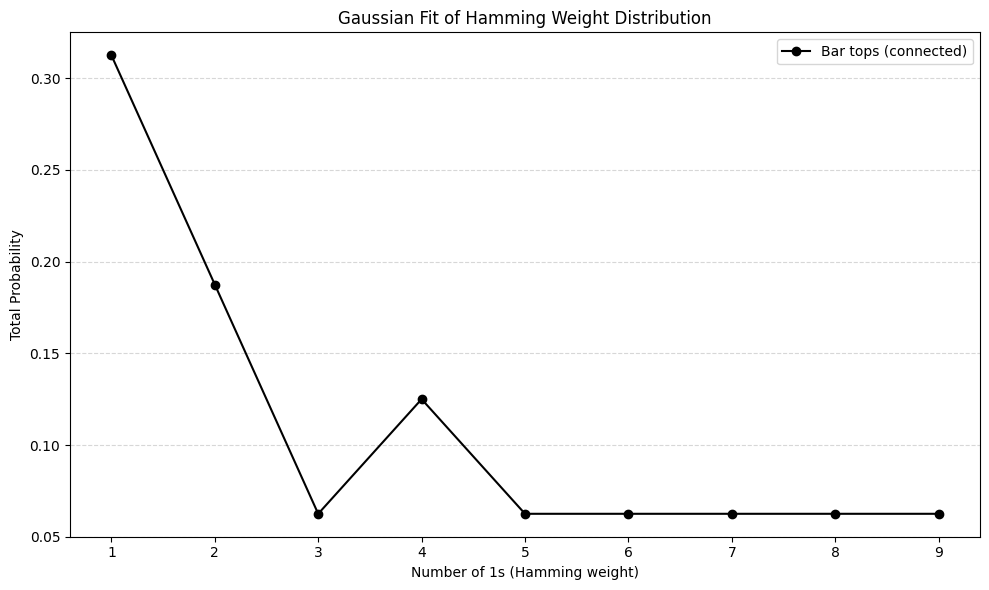

In [265]:
x = []
y = []
sum_count = 0

# Collect data from circuit2()
for i in circuit2():
    if i != 0:
        y.append(i)
        sum_count += 1
        x.append(sum_count)

# # Gaussian function
# def gaussian(x, mu, sigma, amplitude):
#     return amplitude * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# # Initial guess for parameters
# initial_guess = [np.mean(x), np.std(x), max(y)]

# # Fit Gaussian with bounds and higher maxfev
# popt, _ = curve_fit(
#     gaussian,
#     x,
#     y,
#     p0=initial_guess,
#     bounds=([min(x), 0, 0], [max(x), np.inf, np.inf]),
#     maxfev=10000
# )
# mu_fit, sigma_fit, amp_fit = popt

# # Smooth fitted curve
# x_dense = np.linspace(min(x), max(x), 300)
# gaussian_curve = gaussian(x_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', color='black', label="Bar tops (connected)")
# plt.plot(x_dense, gaussian_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


---



#Qiskit


this step is only to show how the General Galton should be if there a reset gate in Pennylane how would the curcuit look like

In [14]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3bc0110f00f493cf0306d47b6ad0b2223bf000800764042b7f9429aba5c5b8de
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 31.1 MB/s eta 0:00:00


In [15]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [26]:
m=n
qc = QuantumCircuit(2*m+2,m+1)

In [27]:
mid=m+1
qc.x(mid)
for i in range(m):
  qc.reset(0)
  qc.h(0)
  for j in range(-i,i+1):
    qc.cswap(0,mid+j,mid+j-1)
    qc.cx(mid+j,0)
    if j==i:
        qc.cswap(0,mid+j,mid+j+1)
        # qc.barrier(0)

result=()
for i in range (1,2*m+2,2):
  result+=(i,)
m_result=()
for i in range(m+1):
  m_result+=(i,)

qc.measure(result,m_result)

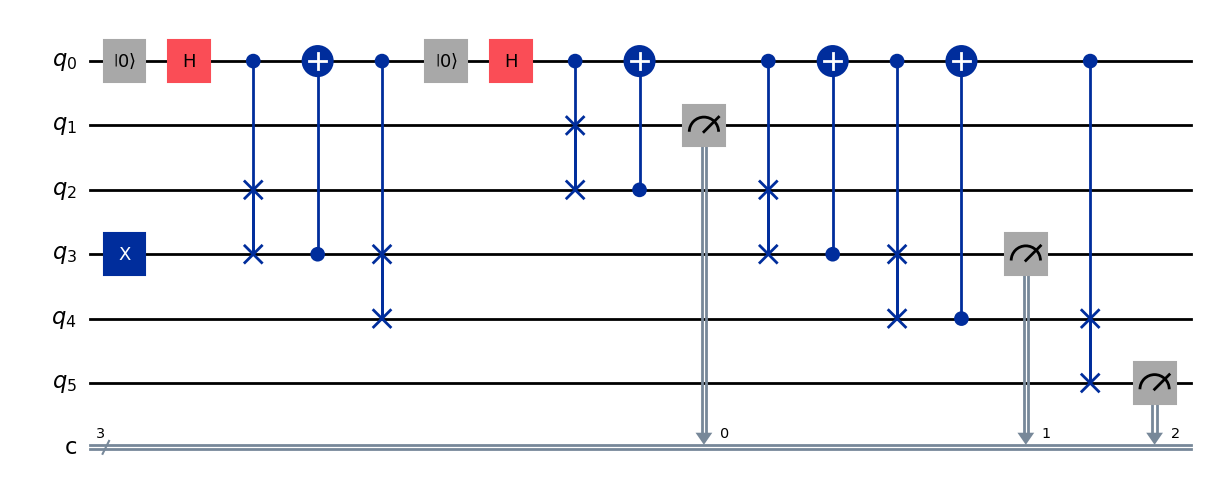

In [28]:
display(qc.draw("mpl"))#, revese_bits="True")

In [19]:
simulator = AerSimulator()
# AerSimulator.from_backend(real_backend)

shots=1024   #to be almost therotical be to left 00
job=simulator.run(qc,shots=shots)
result = job.result()
counts = result.get_counts(qc)

print(counts)

{'1000': 115, '0010': 395, '0100': 374, '0001': 140}


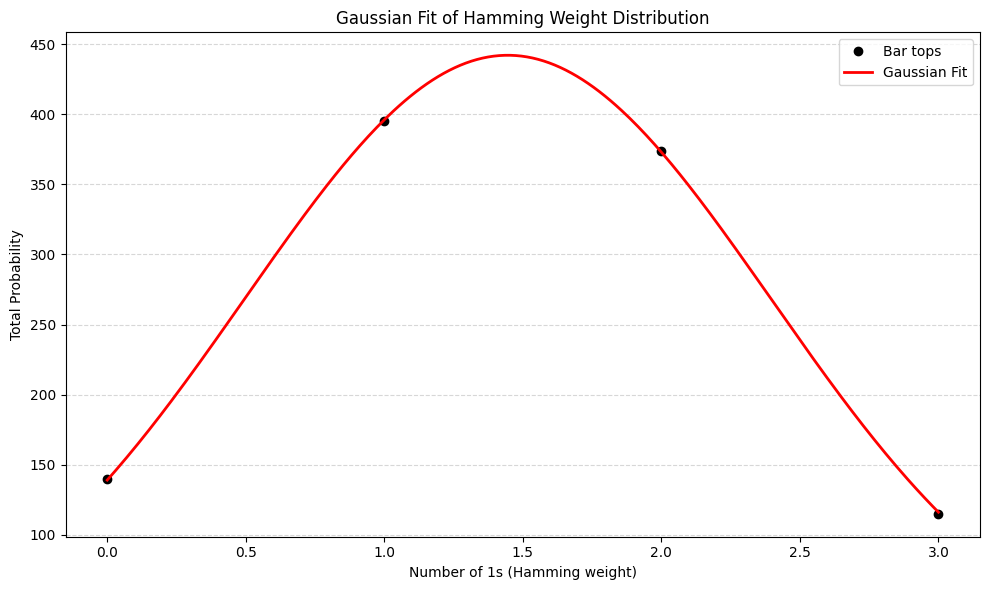

In [20]:
import numpy as np
import math

x3=[]
y3=[]
for i,j in counts.items():
  x3.append(math.log10(int(i)))
  y3.append(j)

from scipy.optimize import curve_fit
def gaussian3(x3, mu, sigma, amplitude):
    return amplitude * np.exp(-(x3 - mu) ** 2 / (2 * sigma ** 2))

# Initial guess: center ≈ mean of x, width ≈ std dev, amplitude ≈ max(y)
initial_guess = [np.mean(x3), np.std(x3), max(y3)]
popt, _ = curve_fit(gaussian3, x3, y3, p0=initial_guess)
mu_fit, sigma_fit, amp_fit = popt

# Smooth fitted curve
x3_dense = np.linspace(min(x3), max(x3), 300)
gaussian3_curve = gaussian3(x3_dense, *popt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x3, y3, 'o', color='black', label="Bar tops")
plt.plot(x3_dense, gaussian3_curve, 'r-', label="Gaussian Fit", linewidth=2)
plt.xlabel("Number of 1s (Hamming weight)")
plt.ylabel("Total Probability")
plt.title("Gaussian Fit of Hamming Weight Distribution")
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()